 # Module 2.2 Basic Visualization of Data with `plotnine`

 In this module, we will learn how to use the `plotnine` package to create basic visualizations of data.

 `plotnine` is a Python implementation of the 'Grammar of Graphics' that was originally developed in the R package `ggplot2`, which is a powerful and flexible visualization package. The grammar of graphics, is a theory of visualization that describes how to **build** a visualization from components. The grammar of graphics is described in detail in the book [The Grammar of Graphics](https://www.springer.com/gp/book/9780387245447) by Leland Wilkinson.

 ## The Grammar of Graphics

 The grammar of graphics describes a visualization as a mapping between data and aesthetic attributes (e.g. color, shape, size, etc.) of geometric objects (e.g. points, lines, bars, etc.). The grammar of graphics is composed of the following components:

 - **Data**: The data to be visualized (usually a `pandas` `DataFrame`)
 - **Aesthetics**: The aesthetic attributes of the geometric objects. (e.g. color, shape, size, etc.)
 - **Geometric Objects**: The geometric objects that represent the data (e.g. points, lines, bars, etc.).
 - **Scales**: The scales that map values in the data space to values in the aesthetic space.
 - **Coordinate System**: The coordinate system that defines the space in which the geometric objects are drawn.
 - **Statistical Transformations**: The statistical transformations that are applied to the data before plotting.
 - **Facets**: The facets that are used to split the data into subsets and plot each subset on a separate panel.

 Using these components, figures are built up in layers. For example, a scatter plot is composed of a layer of points, a layer of scales, and a layer of coordinate system. The grammar of graphics provides a *framework* for building up figures in layers.

 Let's start off by importing some of the packages that we will need.

 We will also set a few options for `plotnine` to make the figures look a little nicer and to suppress some warnings that we will get when we plot the data.

In [1]:
import warnings
import numpy as np
import pandas as pd
import plotnine as pn

from plotnine.options import set_option

set_option("base_family", "Helvetica")
warnings.filterwarnings("ignore")


 ## Import data via `pandas`

 We will again be using the [GSE63482](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE63482) dataset from the DeCoN transcriptomic study.

 * Molyneaux BJ, Goff LA, Brettler AC, Chen HH et al. DeCoN: genome-wide analysis of in vivo transcriptional dynamics during pyramidal neuron fate selection in neocortex. Neuron 2015 Jan 21;85(2):275-288. PMID: 25556833

 As a reminder, this dataset contains gene expression data from mouse sorted populations of cortical projection neurons at four different time points (E15, E16, E18, and P1).

 The data are stored in a tab-delimited text file. We will use the `pandas.read_csv()` function to import the data as a `DataFrame`.

In [2]:
# Import the data as a pandas dataframe
data = pd.read_csv("data/GSE63482_Expression_matrix.tsv", sep="\t")

data.head()


,gene_id,E15_cpn,E15_corticothal,E15_subcereb,E16_cpn,E16_corticothal,E16_subcereb,E18_cpn,E18_corticothal,E18_subcereb,P1_cpn,P1_corticothal,P1_subcereb
0,0610007C21Rik,36.28850,29.69830,33.40490,39.37740,34.43750,30.09790,42.21770,39.85680,32.03480,59.94070,58.40940,54.18620
1,0610007L01Rik,12.06950,10.96610,10.92010,10.35370,11.00810,12.30130,10.78570,11.41970,11.60680,16.32500,17.05410,14.94610
2,0610007P08Rik,6.41238,7.04634,7.64108,6.97155,7.23261,6.70851,6.20445,6.60151,4.91168,3.99317,3.80641,3.23802
3,0610007P14Rik,20.89430,13.67250,14.84450,23.51940,16.24610,28.87290,29.61970,21.17910,36.83880,29.35940,22.10300,32.70000
4,0610007P22Rik,20.80070,19.68650,21.99760,18.09060,18.25500,19.13760,18.08730,18.06960,17.48320,22.25440,23.98430,24.62150


 To start making visualizations of these data with plotnine, we will need to pass this dataframe to the `plotnine.ggplot()` constructor function.

 This function creates a `ggplot` object that we can then add layers to in order to build up a figure.

 We are first going to construct a scatter plot of the gene expression values for the `E15_cpn` and `E18_cpn` time points.

 The `pn.ggplot()` function takes two main arguments:
 - `data`: The data to be visualized (usually a `pandas` `DataFrame`)
 - `mapping`: The mapping of data values onto aesthetic attributes of the plot. (e.g. color, shape, size, etc.) This must be construted using the `pn.aes()` function.

 The 'aesthetic attributes' are a key part of how we are going to communicate to plotnine where and how we want the data to be used in the figure.

 For this particular plot, we are going to tell `pn.aes()` that we want to put the values in the column `E15_cpn` on the x-axis and the values in the column `E18_cpn` on the y-axis.


In [3]:
scatter = pn.ggplot(data, pn.aes(x="E15_cpn", y="E18_cpn"))


 We've now created a base ggplot object and saved it to the variable `scatter`.

 Let's see what this looks like by calling the `draw()` method on the `scatter` object.

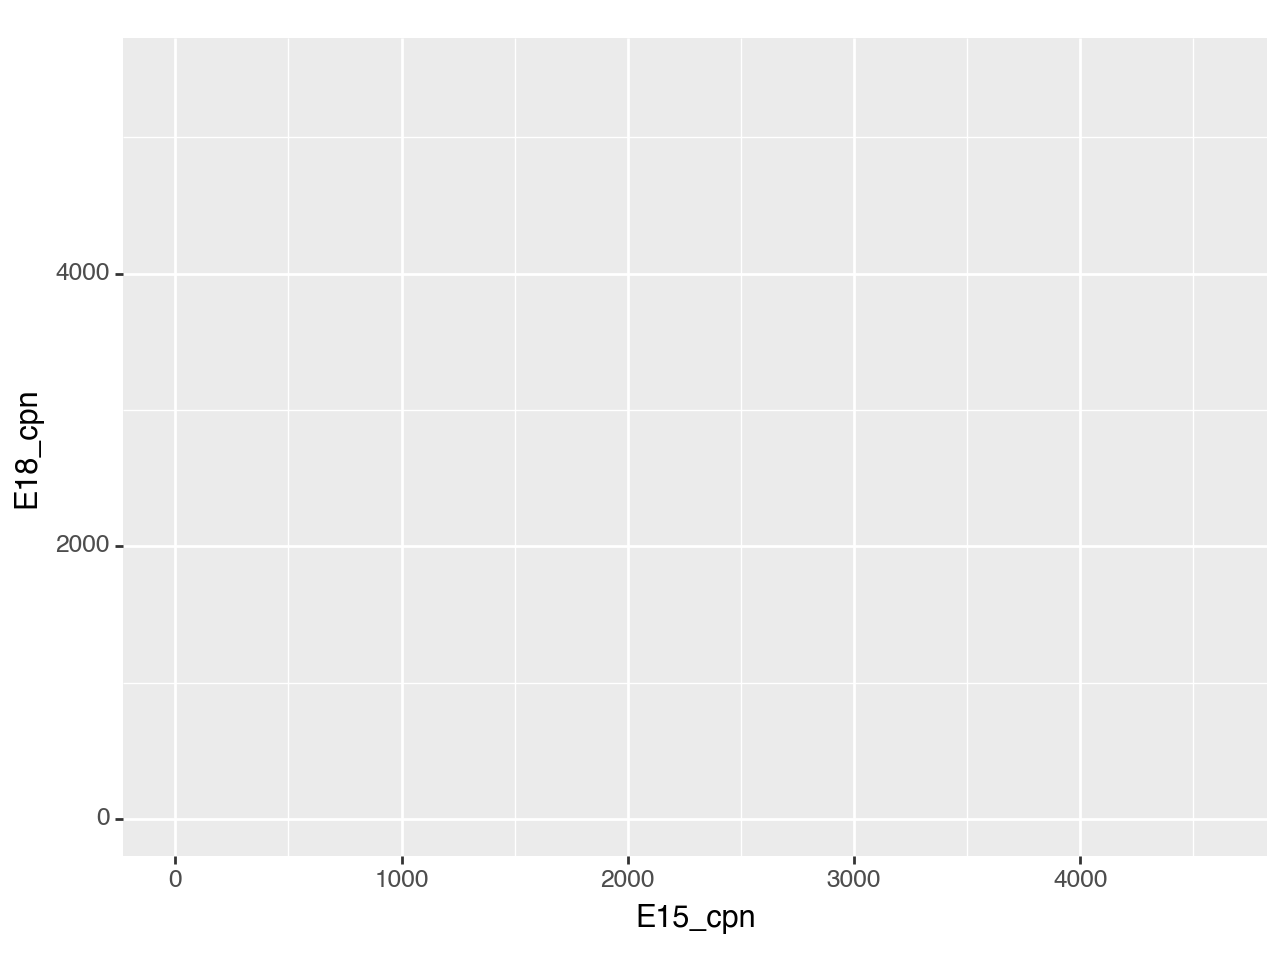

In [4]:
scatter.draw()


 We get something that looks like a plot but no data are visible?!

 This is because we have not yet added any `geometries` to the plot to let plotnine know **how** we would like the data to be presented. There are a [number of geometries](https://plotnine.readthedocs.io/en/stable/api.html#geoms) that we could use (e.g. `geom_point()`, `geom_line()`, `geom_bar()`, etc.) but for this scatterplot we are going to use the `geom_point()` geometry to tell `plotnine` that we want to add points to the plot using the data mapping described by `pn.aes()` above.

 To add a geometry to a plot, we use the `+` operator to quite literally *add* the geometry to the `ggplot` object `scatter`.


In [5]:
scatter = pn.ggplot(data, pn.aes(x="E15_cpn", y="E18_cpn")) + pn.geom_point()


 Now when we call the `draw()` method on the `scatter` object, we get a scatter plot of the data with actual data points!

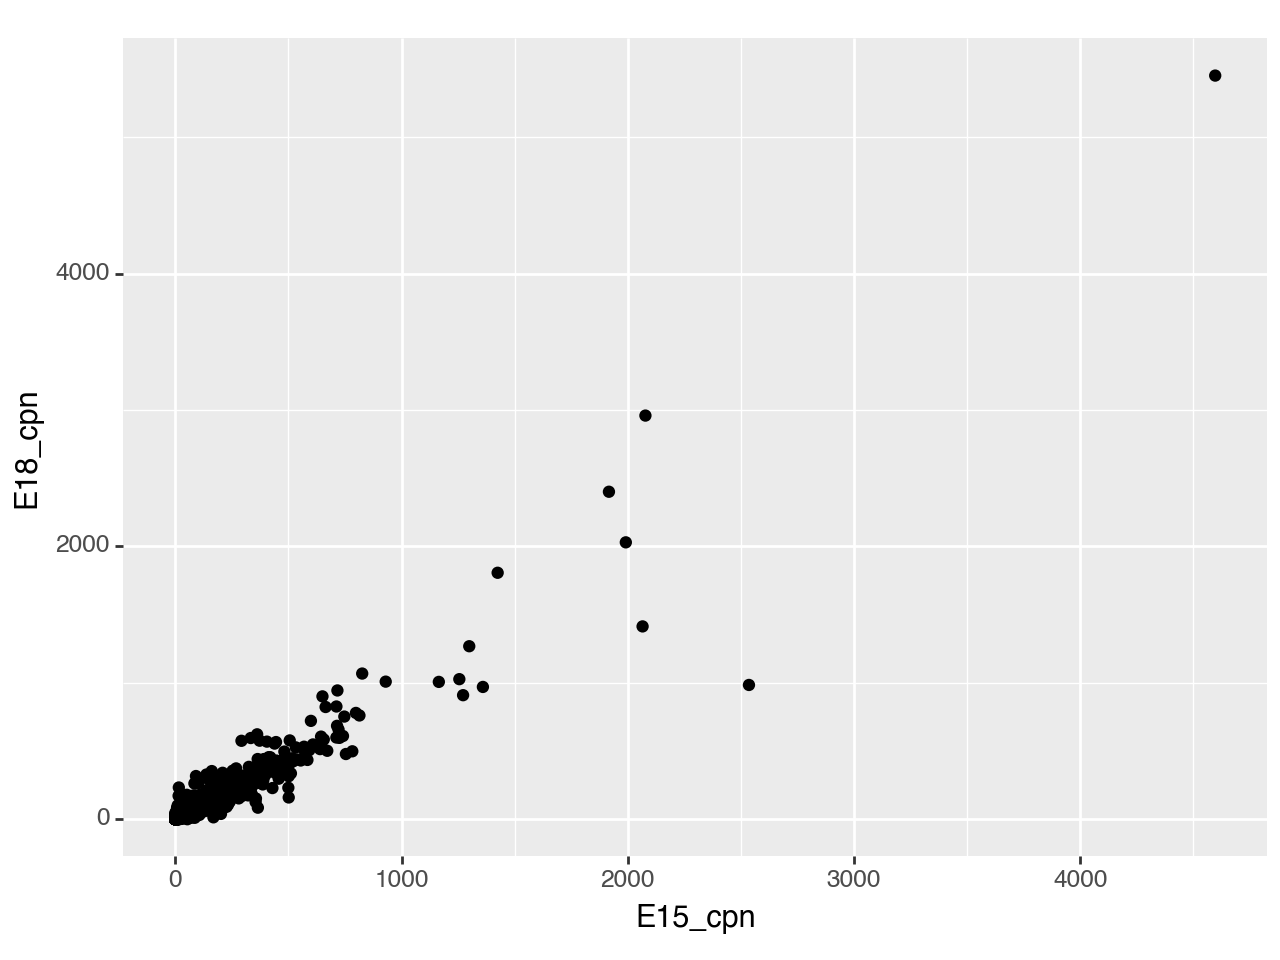

In [6]:
scatter.draw()


 We can continue to add additional 'layers' of information to the plot. For example, we can add a title to the plot using the `ggtitle()` function.

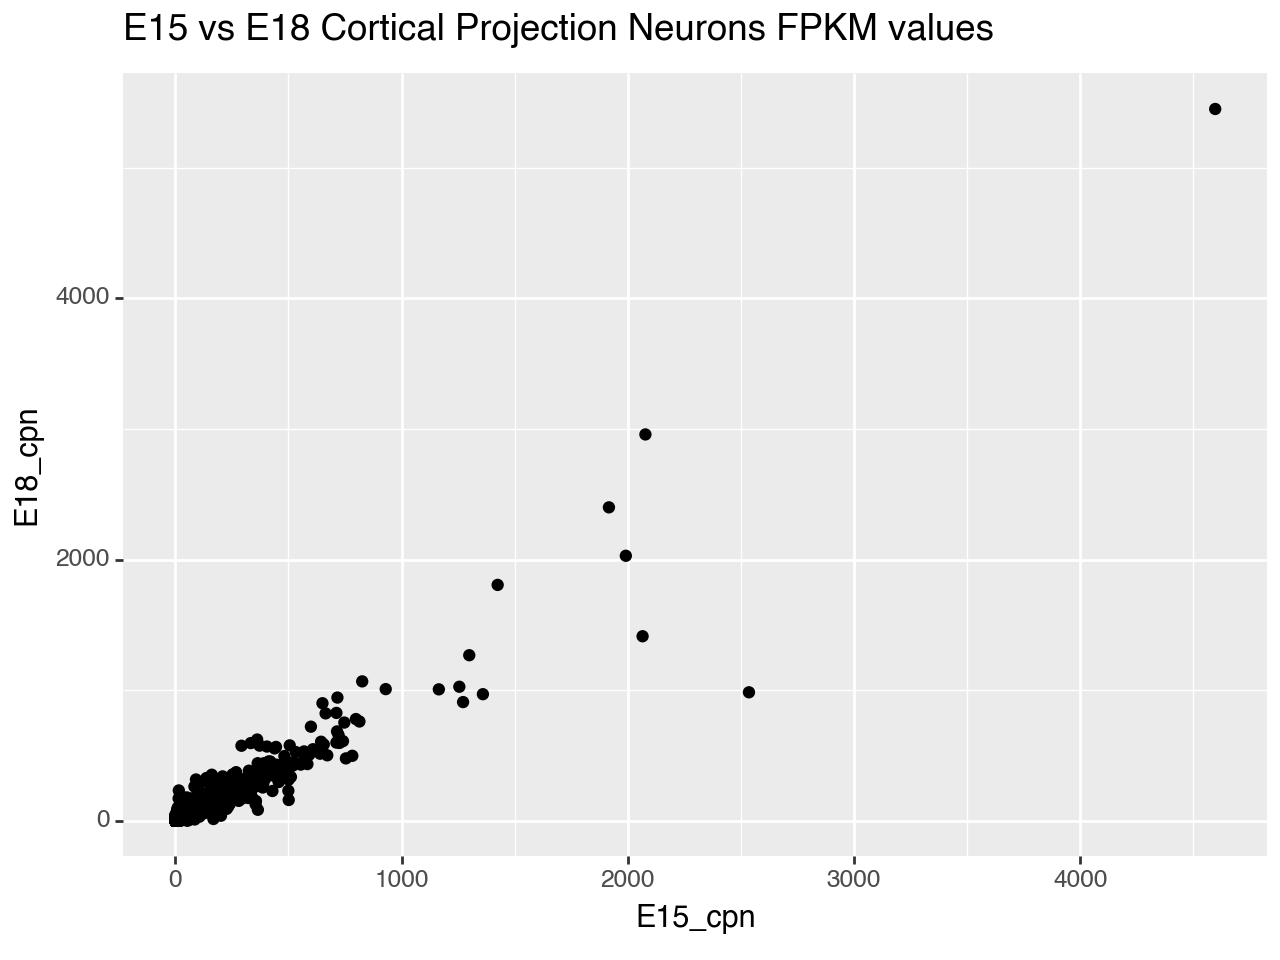

In [7]:
scatter = scatter + pn.ggtitle("E15 vs E18 Cortical Projection Neurons FPKM values")
scatter.draw()


 We could also add another geometry using the same `mapping` that we used to create the `scatter` object.

 This time, we will use the `geom_smooth()` geometry to add a linear regression line to the plot. ($y \sim x$)

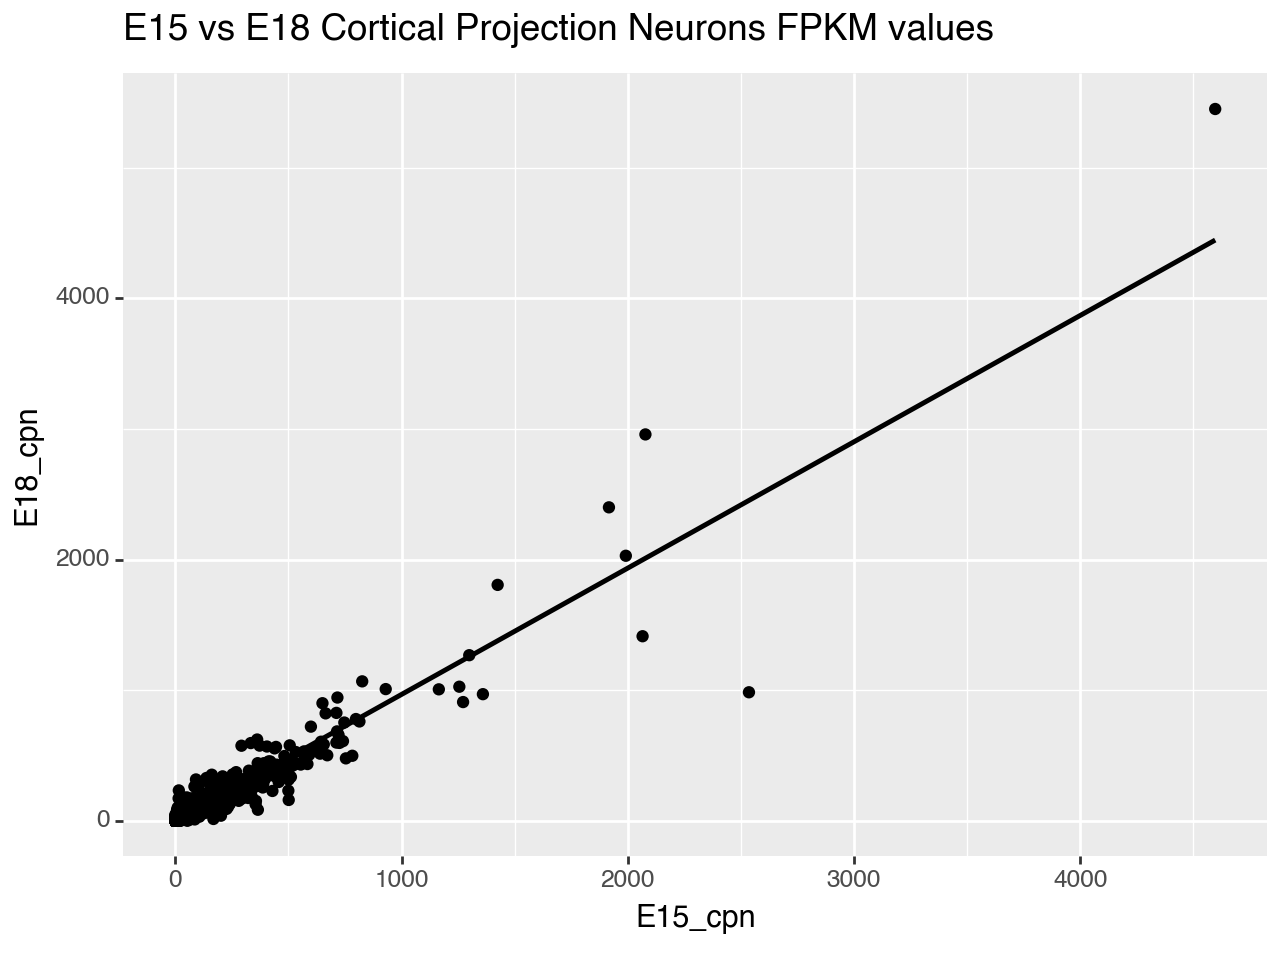

In [8]:
scatter = scatter + pn.geom_smooth(method="lm")

scatter.draw()


 Notice that `geom_smooth()` not only draws the regression line for us, but actually performed the regression for us as well without any additional information from us.

 This is because `geom_smooth()` is a geometry that has a default `stat` of `stat_smooth()` which performs the regression for us, and then uses this to plot the resulting regression line.

 `geom_smoot()` borrowed the existing `mapping` from the `scatter` object to know how to use the data for the regression.

 We will talk more about `stat` functions later.

 ## Planning input data shape(s)
 The `grammar of graphics` framework maps `columns` of a `DataFrame` to `aesthetics` of a plot.  So it's important to think about how we are passing the data to `pn.ggplot()` and how we intend to use the data in the plot.

 For the case of the scatter plot, we are interested in plotting the values in one column against the values in another column.  So we passed the `DataFrame` to `pn.ggplot()` as is, and mapped the values in the `E15_cpn` column to the x-axis and the values in the `E18_cpn` column to the y-axis.

 For other types of plots however, we want to be able to use the values in a single column and map different data values to different aesthetics.

 For example, we might want to map the values in one column (like expression level) to an x or y position, and the values in another to the color, shape, or other aspects of the plot.

 To do this, we need to reshape the data so that we have a single column for the values that we want to use, and then additional columns for the values that we want to map to the aesthetics.

 You may recall that this is considered a 'tidy' data format and you'll see in a moment how this becomes a useful way to organize the data for plotting.

 First let's take a look at the data that we have in the `data` `DataFrame`.

In [9]:
data.head()


,gene_id,E15_cpn,E15_corticothal,E15_subcereb,E16_cpn,E16_corticothal,E16_subcereb,E18_cpn,E18_corticothal,E18_subcereb,P1_cpn,P1_corticothal,P1_subcereb
0,0610007C21Rik,36.28850,29.69830,33.40490,39.37740,34.43750,30.09790,42.21770,39.85680,32.03480,59.94070,58.40940,54.18620
1,0610007L01Rik,12.06950,10.96610,10.92010,10.35370,11.00810,12.30130,10.78570,11.41970,11.60680,16.32500,17.05410,14.94610
2,0610007P08Rik,6.41238,7.04634,7.64108,6.97155,7.23261,6.70851,6.20445,6.60151,4.91168,3.99317,3.80641,3.23802
3,0610007P14Rik,20.89430,13.67250,14.84450,23.51940,16.24610,28.87290,29.61970,21.17910,36.83880,29.35940,22.10300,32.70000
4,0610007P22Rik,20.80070,19.68650,21.99760,18.09060,18.25500,19.13760,18.08730,18.06960,17.48320,22.25440,23.98430,24.62150


 We have a column fo each sample that contains the FPKM values for each gene (row).  We also have a column for the `gene_id` that contains the gene identifier for each row.

 Let's `melt()` the data so that we have a single column for the FPKM values and then additional columns for the `gene_id`, and `condition` so that we can use these values to map to different `aesthetics`.

In [10]:
# Melt the 'wide' dataframe into a 'long' dataframe
data_melted = data.melt(id_vars=["gene_id"])

data_melted.head()


,gene_id,variable,value
0,0610007C21Rik,E15_cpn,36.28850
1,0610007L01Rik,E15_cpn,12.06950
2,0610007P08Rik,E15_cpn,6.41238
3,0610007P14Rik,E15_cpn,20.89430
4,0610007P22Rik,E15_cpn,20.80070


 Now we have a single column for the FPKM values and additional columns for the `gene_id` and `variable` (which contains the sample name). Let's rename the `variable` column to `condition` and the `value` column to `fpkm` to make things a little clearer.

In [11]:
data_melted.columns = ["gene_id", "condition", "fpkm"]

data_melted.head()


,gene_id,condition,fpkm
0,0610007C21Rik,E15_cpn,36.28850
1,0610007L01Rik,E15_cpn,12.06950
2,0610007P08Rik,E15_cpn,6.41238
3,0610007P14Rik,E15_cpn,20.89430
4,0610007P22Rik,E15_cpn,20.80070


 Additionally, the values in the `condition` column contain two useful pieces of information: the `age` and the `celltype` of each sample.  Let's split the `condition` column into two new columns so that we can use these values to independently map to different `aesthetics`.

 To do this, we will use a method owned by the `pandas.Series` object called `str.split()` ([pandas.Series.str.split](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html)).

 This method will split the values in a column on a given character string ("_") and return a new `DataFrame` with the split values in separate columns. This is a specific function that works on `pandas.Series` objects containing `strings`.

 We will use the `expand=True` argument to tell `pandas` to return the split values as separate columns and then `assign` the new columns to the `data_melted` `DataFrame`.

In [12]:
# Split the 'condition' column into two columns ['age','celltype']
data_melted[["age", "celltype"]] = data_melted["condition"].str.split("_", expand=True)

data_melted


,gene_id,condition,fpkm,age,celltype
0,0610007C21Rik,E15_cpn,36.288500,E15,cpn
1,0610007L01Rik,E15_cpn,12.069500,E15,cpn
2,0610007P08Rik,E15_cpn,6.412380,E15,cpn
3,0610007P14Rik,E15_cpn,20.894300,E15,cpn
4,0610007P22Rik,E15_cpn,20.800700,E15,cpn
...,...,...,...,...,...
309343,vesl-2,P1_subcereb,0.060259,P1,subcereb
309344,wdp103,P1_subcereb,0.402615,P1,subcereb
309345,wdr4,P1_subcereb,10.236700,P1,subcereb
309346,wiz,P1_subcereb,4.180550,P1,subcereb


 Now `age` and `celltype` are separate columns in the `data_melted` `DataFrame` that we can use to map to different `aesthetics` in our plots.

 Let's make a new plot using the `data_melted` `DataFrame` that we just created.

 This time, we are going to use the `geom_boxplot()` geometry to create a boxplot of all of the `fpkm` values for each `age` and `celltype` combination.



In [13]:
box_plot = (
    pn.ggplot(data_melted, pn.aes(x="age", y="fpkm", fill="celltype"))
    + pn.geom_boxplot()
)


 For this plot, we are mapping the categorical values in the `age` column to the x-axis, the values in the `fpkm` column to the y-axis, and the values in the `celltype` column to the fill color of the boxplots.

 Here we're using the same style of plot construction that we used above (instantiating with `ggplot()', adding a `mapping` with `aes()`, and then adding a `geometry` with `geom_boxplot()`), but we're wrapping all of this in a set of outer parentheses `()`.

 We do this to help organize the lines of code and make it easier to read. Python will treat everything inside the outer parentheses as a single line of code, so we can break up the code across multiple lines.

 This can be a helpful way to visualize how your `ggplot` object is being constructed.  The first line should be `pn.ggplot()` and include universal `aesthetic mappings`, and subsequent lines should add (`+`) `geometries` or other `layers` that you want to add to the plot.


 Now lets see what our new boxplot looks like.

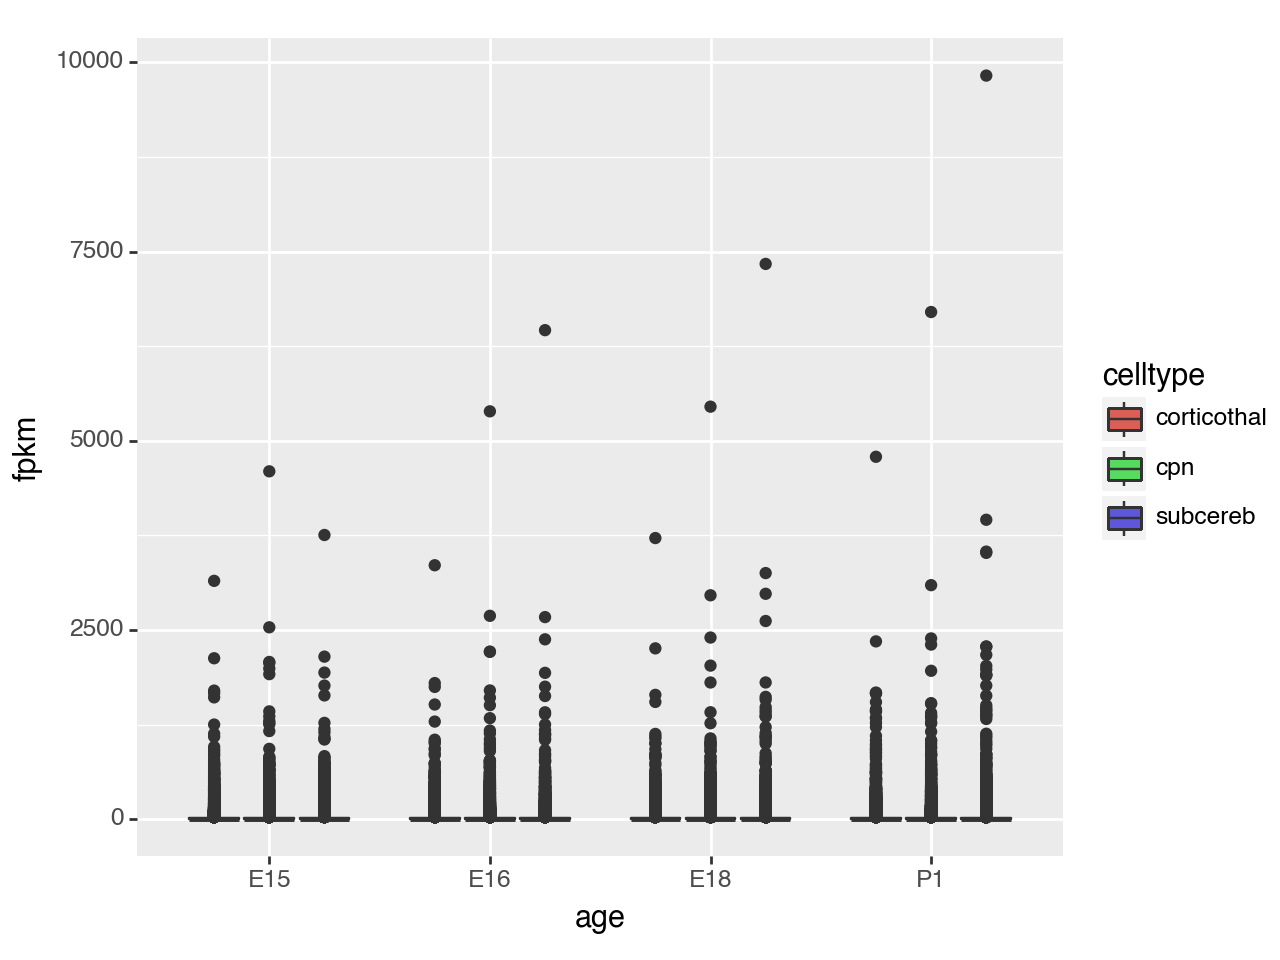

In [14]:
box_plot.draw()

 This takes a bit longer to draw because `geom_boxplot()` is calculating the boxplot statistics for each `age` and `celltype` combination.

 But notice how we now have a summarized boxplot of `fpkm` values for each `age` and `celltype` combination. `plotnine` was also nice enough to automatically add a legend for us to help us interpret the plot.


 Let's add a title to our plot

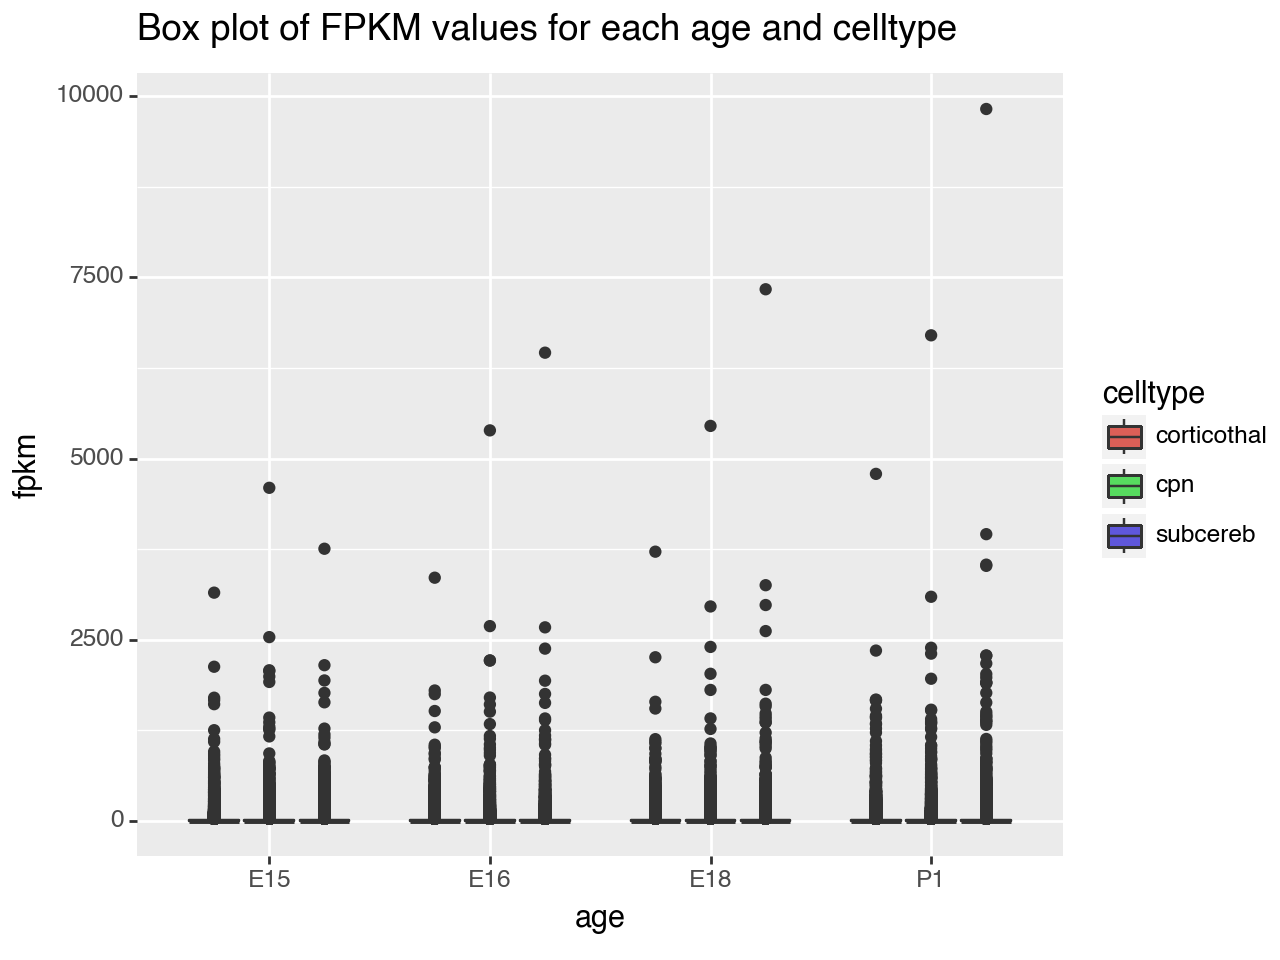

In [15]:
box_plot = box_plot + pn.ggtitle("Box plot of FPKM values for each age and celltype")

box_plot.draw()


 So there is at least one issue with our plot.  Raw FPKM values in general are not normally distributed, and tend to all be compressed at low values.  This makes it difficult to see the differences between the different `age` and `celltype` combinations.

 One option might be to change the y-axis to a log scale to help spread out the values.  We can do this by adding a `scale_y_log10()` scale to the plot.

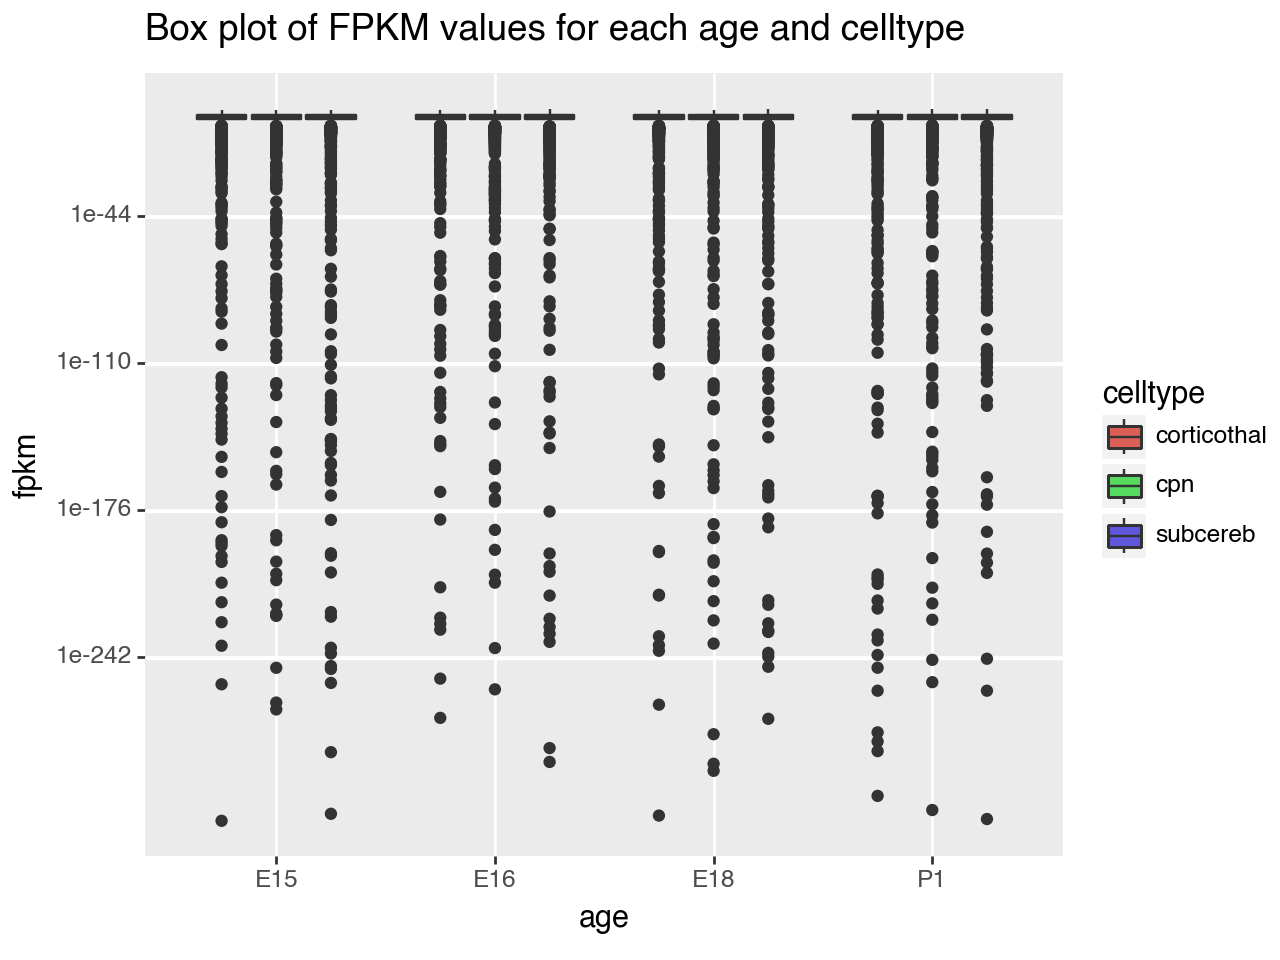

<Figure Size: (640 x 480)>

In [16]:
box_plot + pn.scale_y_log10()



 This has a few other issues now. The log of fractional values (0>x>1) can have a large range of values as well.

 Furthermore, the log of 0 is undefined, and `plotnine` is actually dropping values here that are true zeros because it can't take the log of 0. (we would see this if we hadn't suppressed warnings.)


 Another option is to pre-compute the log of the FPKM values and then plot the log values instead.  This will help spread out the values and make it easier to see the differences between the different `age` and `celltype` combinations.

 We can also address the 'log of zero' issue by adding a small value (1) to the FPKM values before taking the log.  This will shift all of the values up by 1, and then the log of 1 is 0, so we won't have any undefined values.

 Adding a 'pseudocount' to all values is a common trick to use when taking the log of values that might include zeros.

 Let's pre-compute a new `log_fpkm` column in `data_melted` that has the $log_{10}(fpkm + 1)$ values.

In [17]:
# Log transform the gene expression values
pseudocount = 1
data_melted["log_fpkm"] = np.log10(data_melted["fpkm"] + pseudocount)

data_melted.head()


,gene_id,condition,fpkm,age,celltype,log_fpkm
0,0610007C21Rik,E15_cpn,36.28850,E15,cpn,1.571575
1,0610007L01Rik,E15_cpn,12.06950,E15,cpn,1.116259
2,0610007P08Rik,E15_cpn,6.41238,E15,cpn,0.869958
3,0610007P14Rik,E15_cpn,20.89430,E15,cpn,1.340331
4,0610007P22Rik,E15_cpn,20.80070,E15,cpn,1.338470


 Ok.  Let's remake our `box_plot`` using the `log_fpkm` column instead of the `fpkm` column.

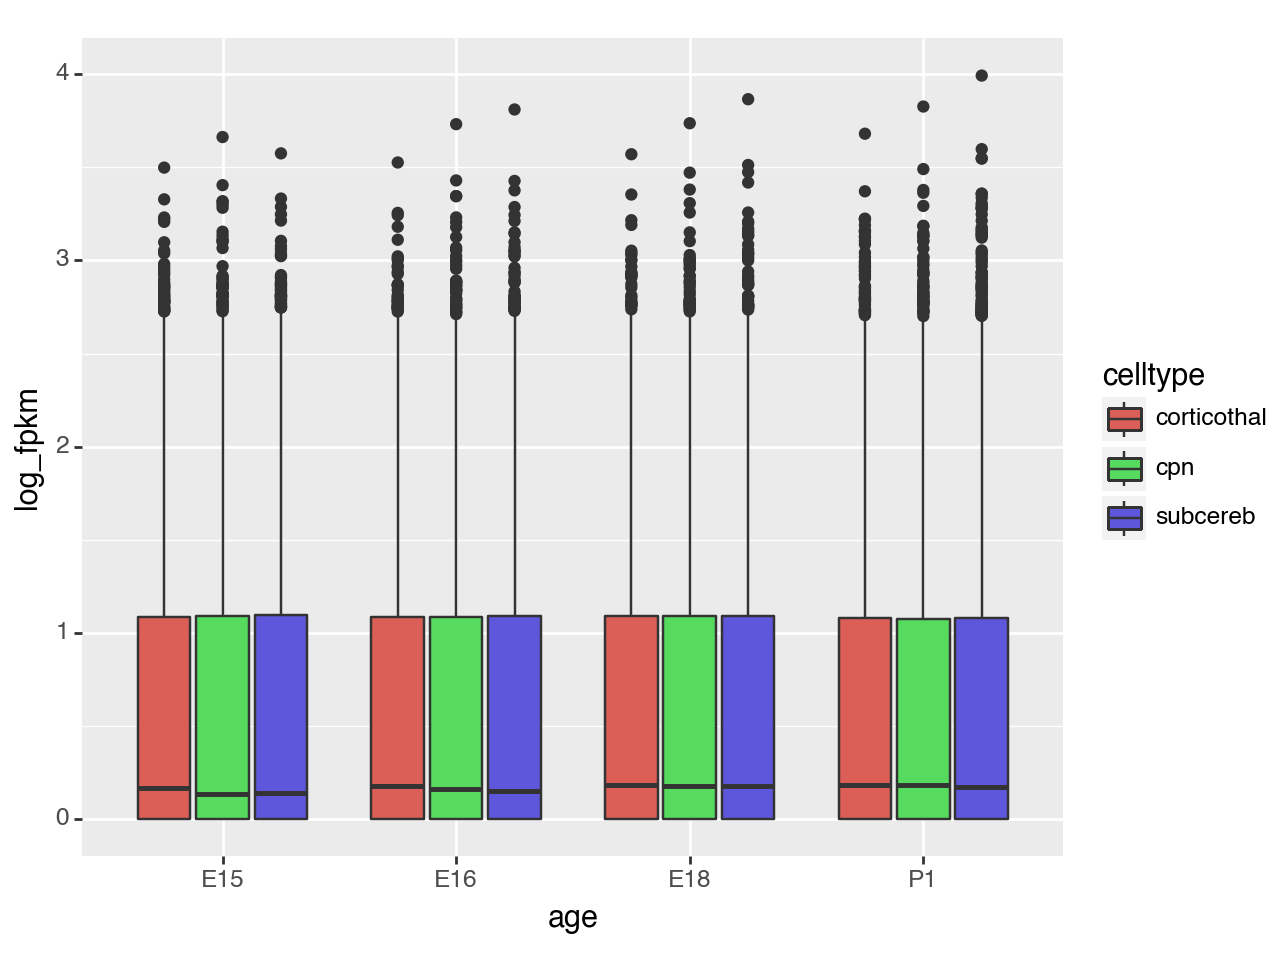

In [18]:
box_plot = (
    pn.ggplot(data_melted, pn.aes(x="age", y="log_fpkm", fill="celltype"))
    + pn.geom_boxplot()
)

box_plot.draw()


 There are other geometries that we could use to visualize the summary statistics of the data.  For example, we could use the `geom_violin()` geometry to create a violin plot of the data.


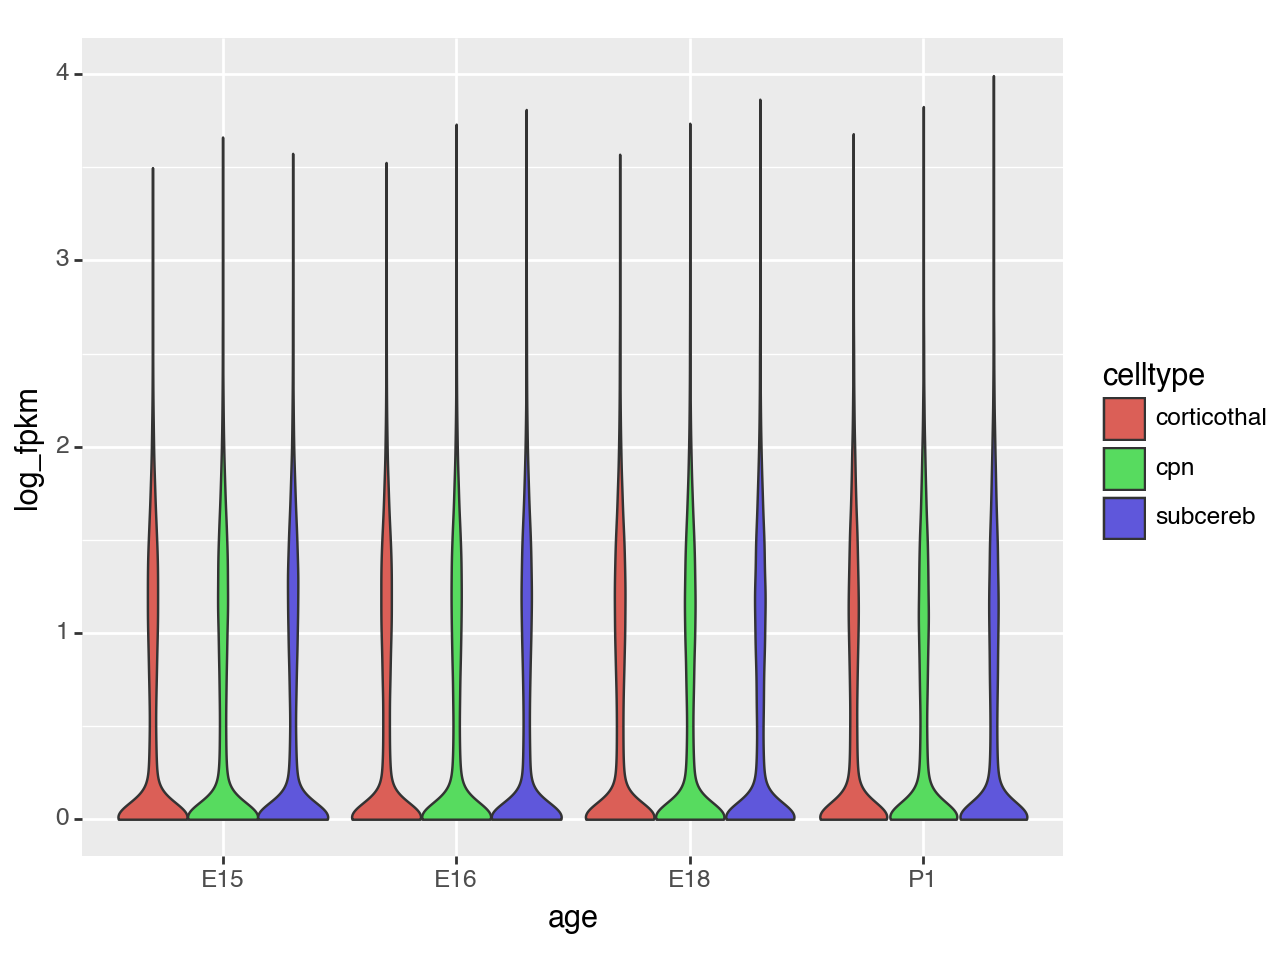

<Figure Size: (640 x 480)>

In [19]:
base_plot = (
    pn.ggplot(data_melted, pn.aes(x="age", y="log_fpkm", fill="celltype"))
)
base_plot + pn.geom_violin()

 Notice that the *only* difference between these two plot constructors is the `geometry` that we are using.  We are using the same `data` and `mapping` for both plots.

 ## Exploring a little deeper


 ## Faceting
 Sometimes it is helpful to split a data visualization into multiple panels based on the values in a column.  This is called `faceting` and is a very useful way to explore data.

 We can add a `facet` layer to a plot using the `pn.facet_wrap()` or `pn.facet_grid()` functions.

 Let's create a new box plot with `condition` on the x-axis, `log_fpkm` on the y-axis, and the fill color mapped to `celltype`.

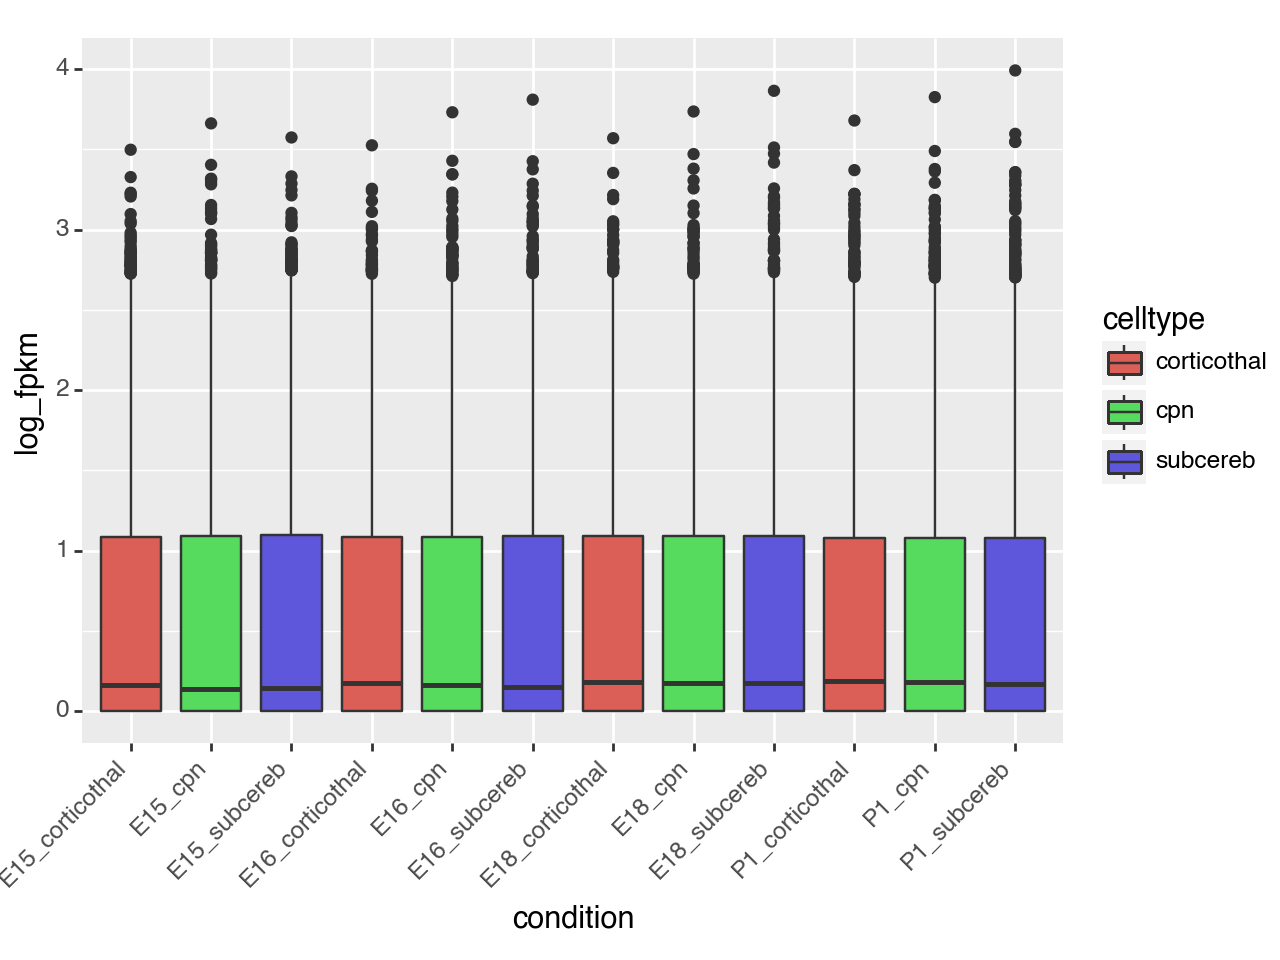

In [20]:
box_plot = (
    pn.ggplot(data_melted, pn.aes(x="condition", y="log_fpkm", fill="celltype"))
    + pn.geom_boxplot()
    + pn.theme(axis_text_x=pn.element_text(rotation=45, hjust=1)) # this is adding a layer to rotate the x-axis labels
)
box_plot.draw()


 We can use `pn.facet_wrap()` to split the plot into separate panels for each `age`.

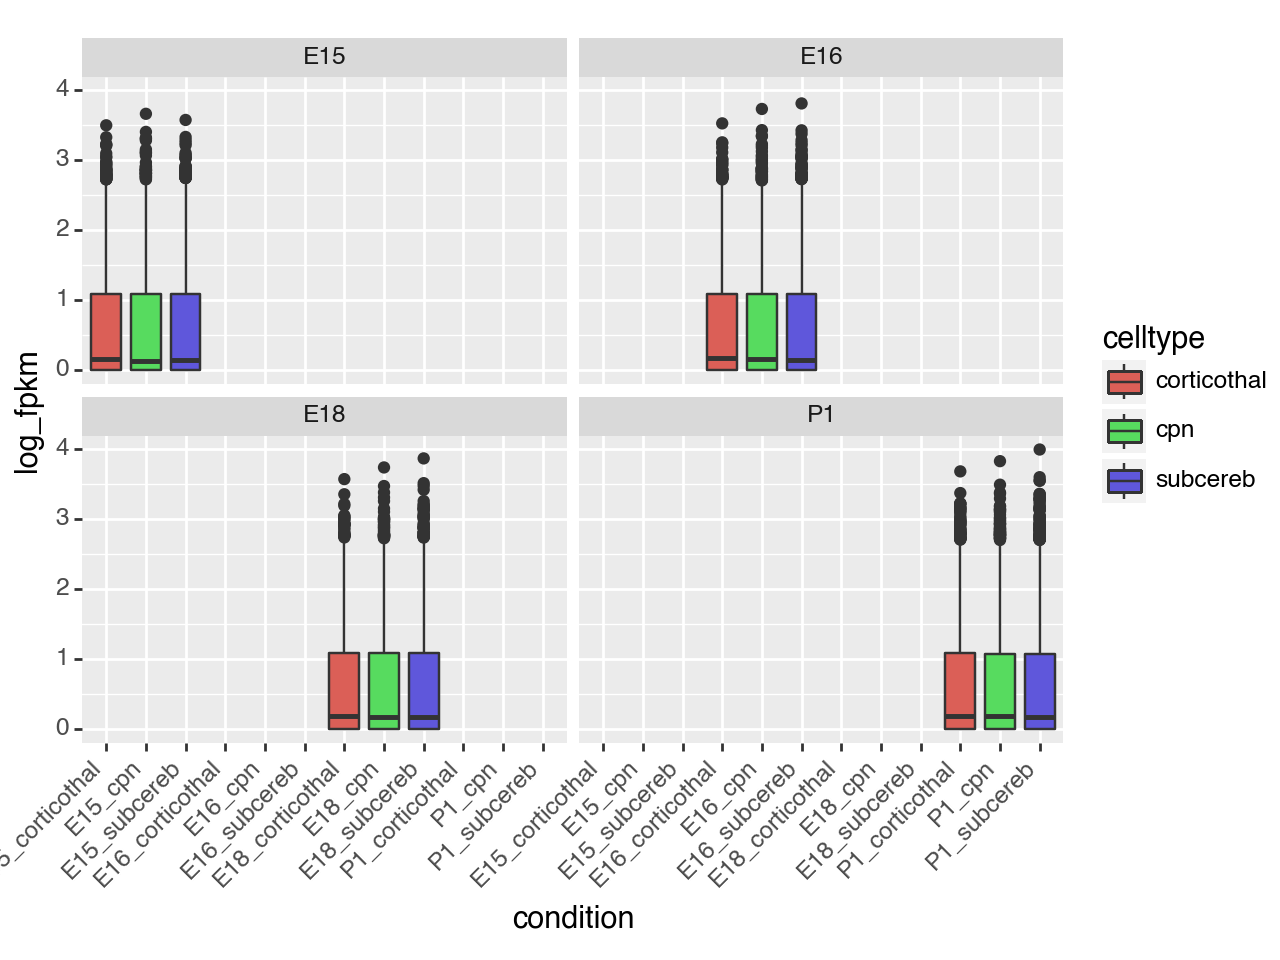

<Figure Size: (640 x 480)>

In [21]:
box_plot + pn.facet_wrap("age")


 `pn.facet_wrap()` splits the data by the values in the column that we pass to it and then plots each subset of the data on a separate panel or 'facet'.

 `facet_wrap()` will automatically determine the number of rows and columns to use to display the panels.  We can also specify the number of rows and columns to use using the `nrow` and `ncol` arguments.

 By default, `facet_wrap()` will keep all of the axes the same in each panel, but for this particular plot, this leads to a lot of wasted space.  We can tell `facet_wrap()` to use `scales="free_x"` to allow the x-axis to vary between panels, including only the relevant conditions for each panel.

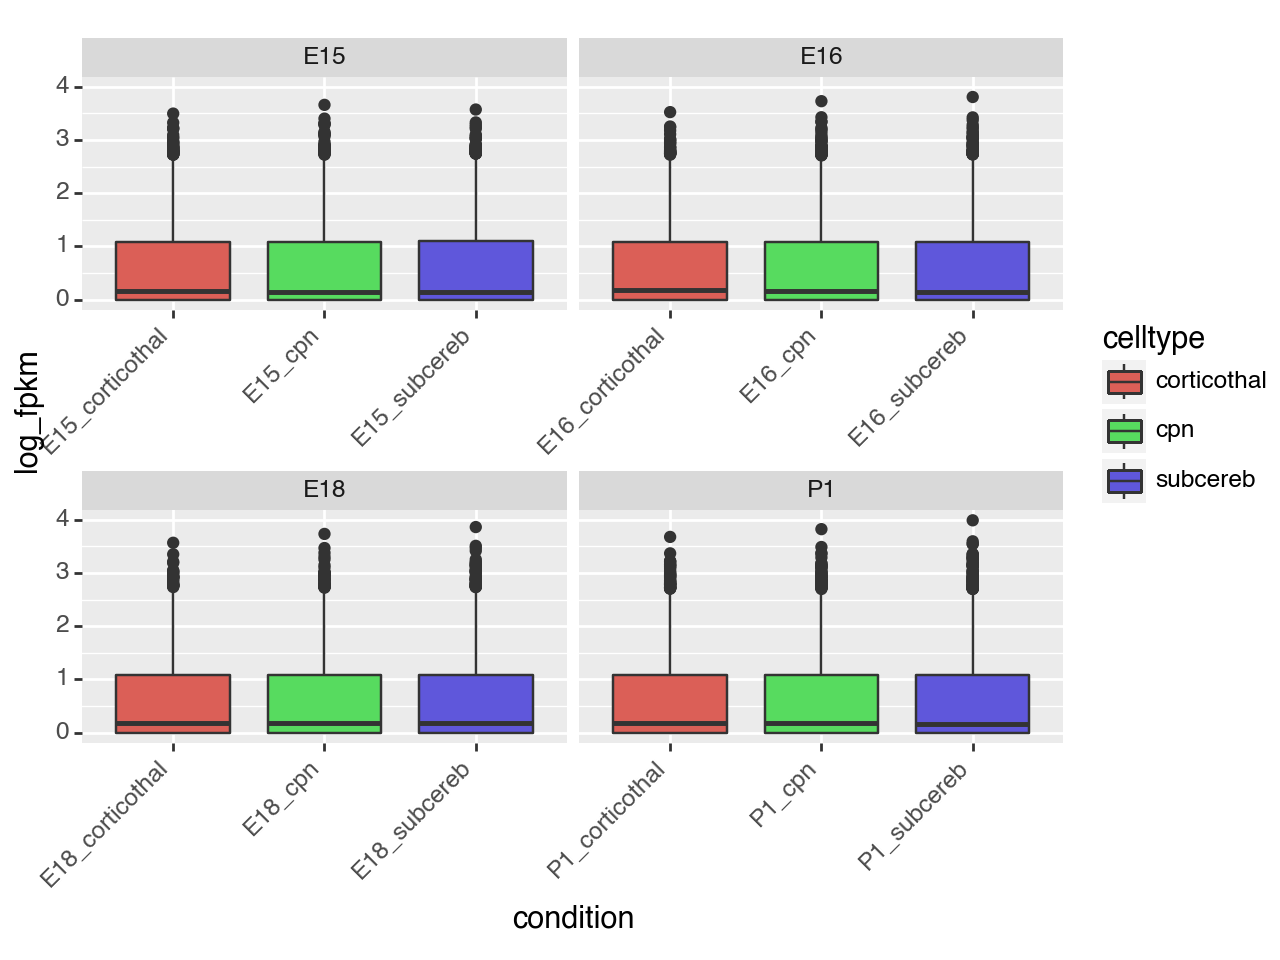

<Figure Size: (640 x 480)>

In [22]:
box_plot + pn.facet_wrap("age", scales="free_x")


 By changing the `facet_wrap()` argument from `age` to `celltype`, we can quickly re-arrange the plot for a different look.

 `pn.facet_grid()` works in a similar way, but gives you a bit more control over the layout of the panels.

 You can specify the columns and rows to use for the panels using a 'regression style' formula ($y \sim x$) where $y$ values are mapped to column panels and $x$ values are mapped to row panels

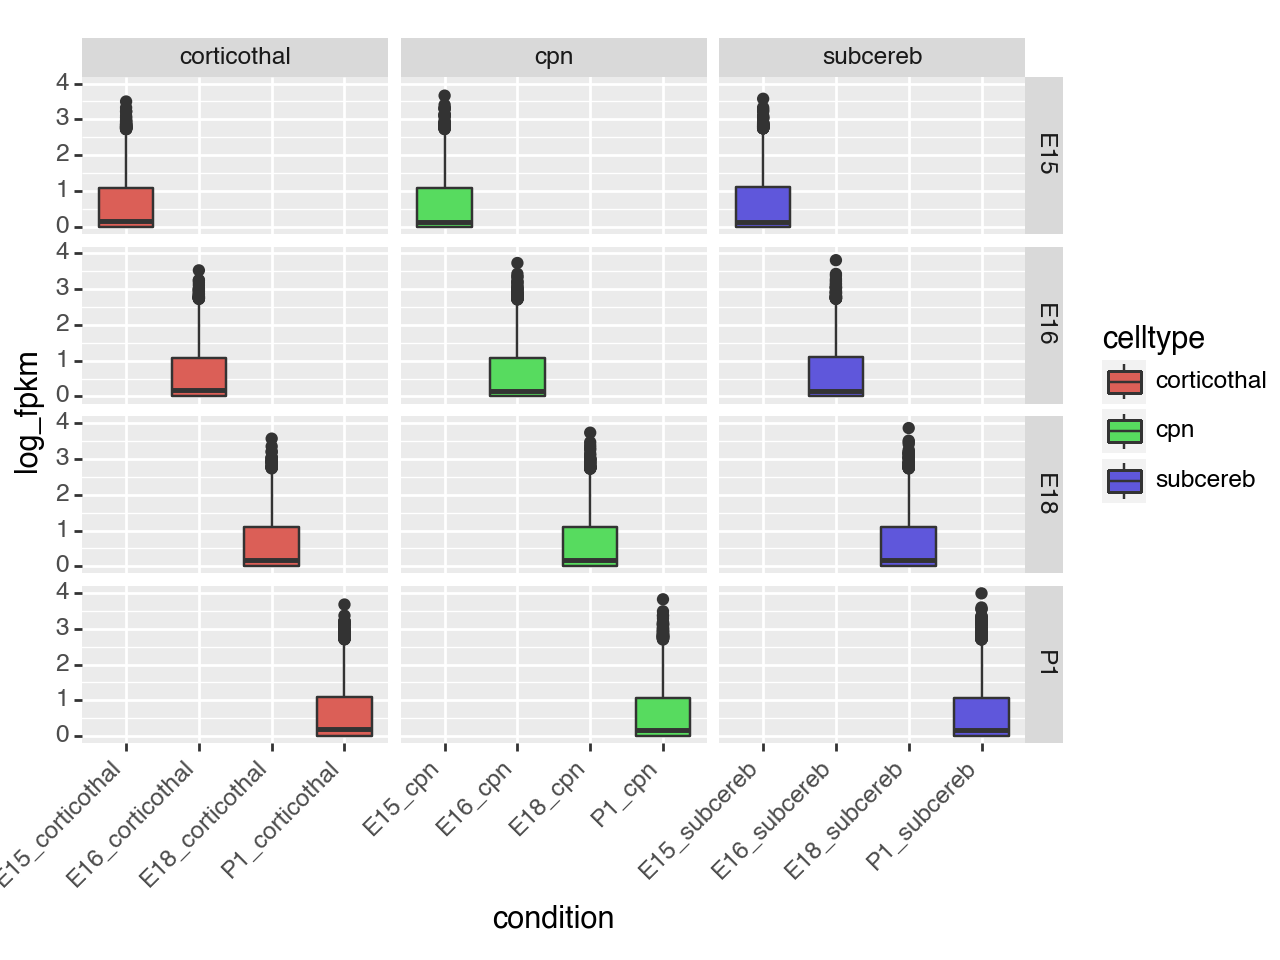

<Figure Size: (640 x 480)>

In [23]:
box_plot + pn.facet_grid("age ~ celltype", scales="free_x")


 It doesn't make particular sense for this plot, but notice how we have two dimensions of panel faceting.

 This can be a very convenient way to control plot layout if you have a larger number of data attributes that you would like to compare.

# Building plots with functions

 Constructing good quality plots that are visually appealing, and convey what you want them to convey can be a bit of an art.

 It can take a lot of trial and error to get a plot to look the way you want it to, and often this involves adding a number of layers to the plot.

 This can lead to a lot of repeated code, which can be a bit of a pain to write and maintain.

 Take, for example, the following.  Suppose we want to make a gene-specific plot showing the differences in expression between the different `celltypes` across the developmental time points.

 We could construct the following visualization

In [24]:
pax6_plot = pn.ggplot(                              # instantiate a ggplot object
    data_melted[data_melted["gene_id"] == "Pax6"],  # subset the data to include only those rows for the gene of interest
    pn.aes(x="age", y="fpkm", color="celltype"),   # map the data to the appropriate aesthetics.  Here we are going to create different lines for each celltype across age.
)

#Add a geom_line() layer to the plot
pax6_plot = pax6_plot + pn.geom_line(pn.aes(group="celltype"))


 Important note, the `geom_line()` layer needs a bit more information about how *exactly* to draw the lines.

 Specifically, we need to tell it that we want to group the data by `celltype` so that it knows to draw a separate line for each `celltype`.

 We do this by passing `group="celltype"` to the `pn.aes()` function as an additional argument inside of `geom_line()`. Effectively 'adding' another aesthetic mapping to the plot, that will *only* be used by the `geom_line()` geometry.

 Lets see what this looks like

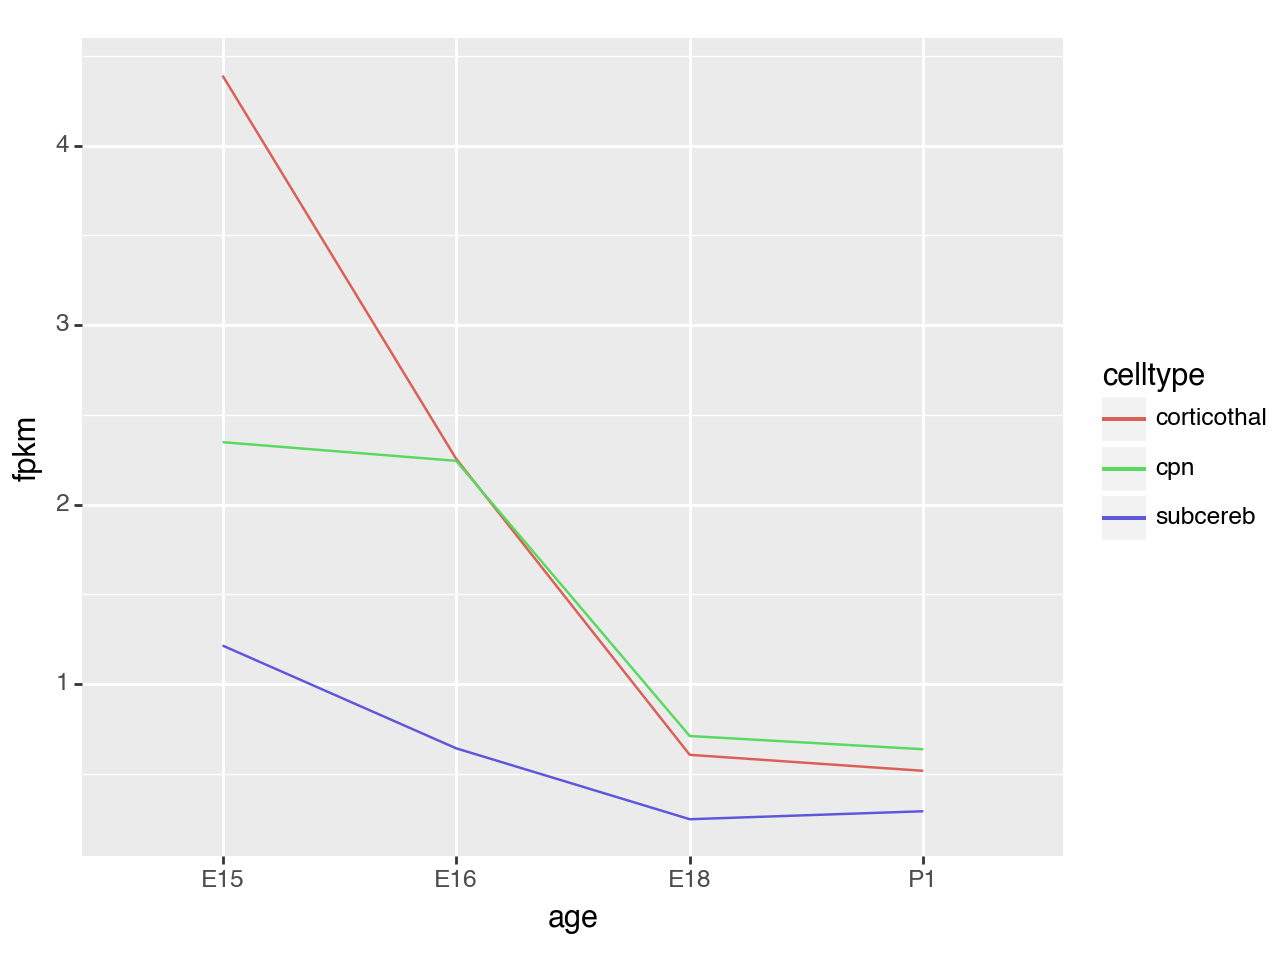

In [25]:
pax6_plot.draw()


 Beautiful, let's add a few more bells and whistles to the plot to make it look a little nicer.


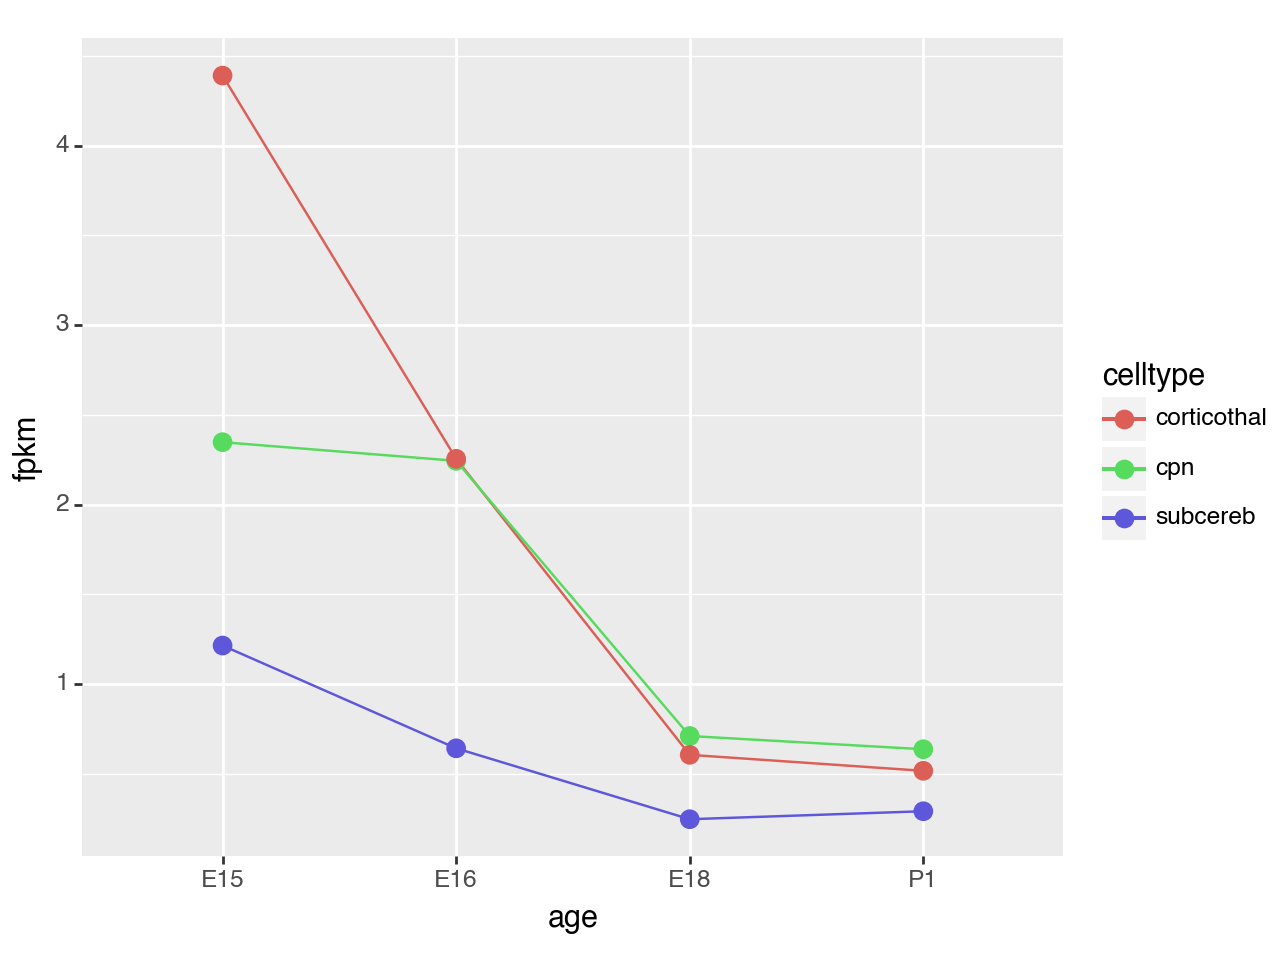

In [26]:
pax6_plot = pax6_plot + pn.geom_point(size=3) # adds another geometry layer of points ON TOP OF the existing line geometry (order matters!) and sets the size of the points to 3 (default:1)

pax6_plot.draw()


 Let's add a title to the plot, as well as tweak the axis labels to say something a bit more informative and stylized


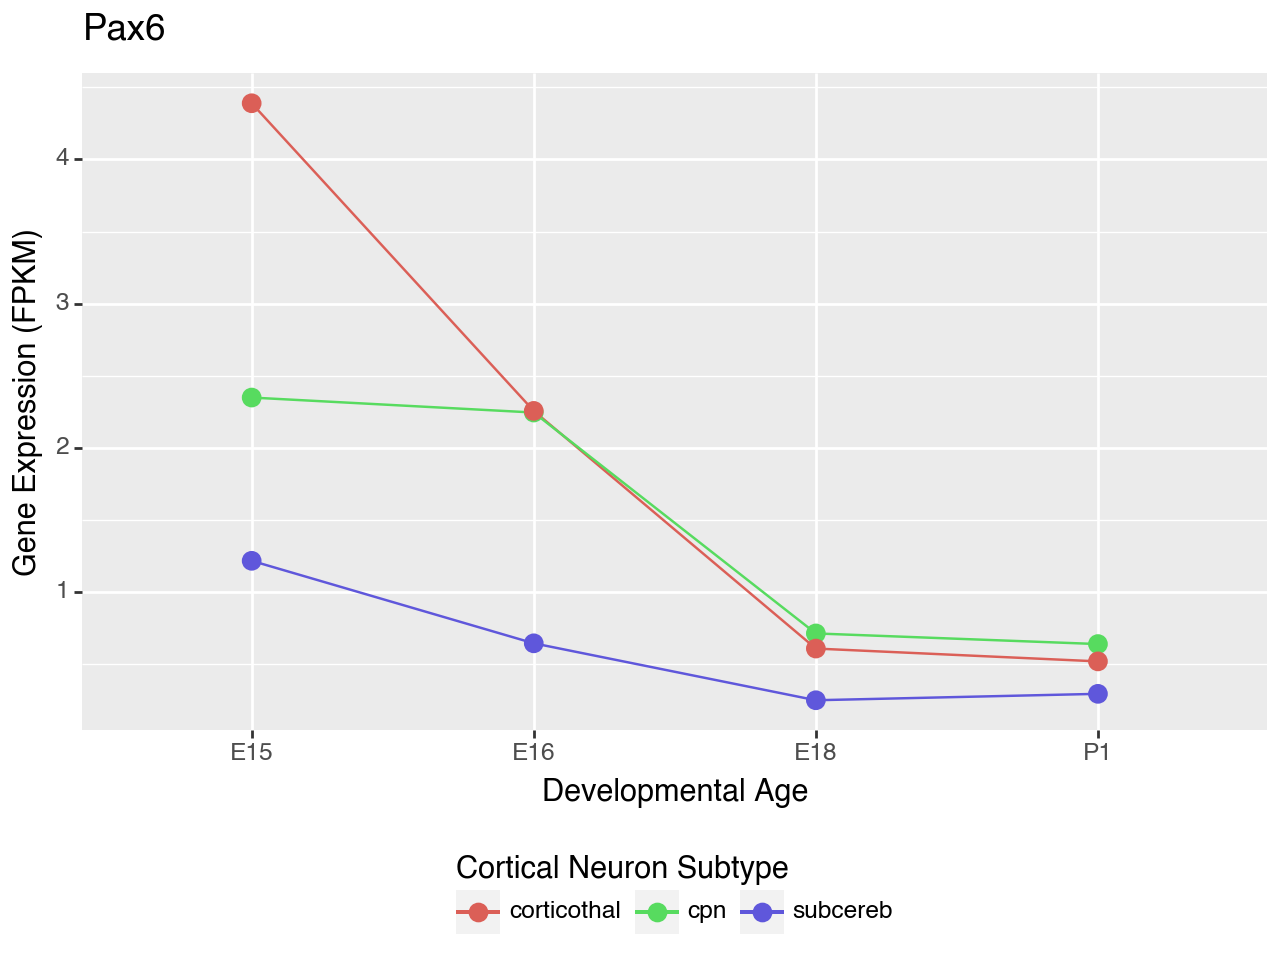

In [27]:
pax6_plot = (
    pax6_plot + 
    pn.ggtitle("Pax6") + 
    pn.xlab("Developmental Age") + 
    pn.ylab("Gene Expression (FPKM)") +
    pn.labs(color="Cortical Neuron Subtype") + # this is adding a legend title
    pn.theme(legend_position="bottom") # this is moving the legend to the bottom of the plot so as to minimize whitespace
)
pax6_plot.draw()


 Our final plot looks beautiful! But it took a decent amount of code to get there.  For clarity, here is the full code to create this one plot.

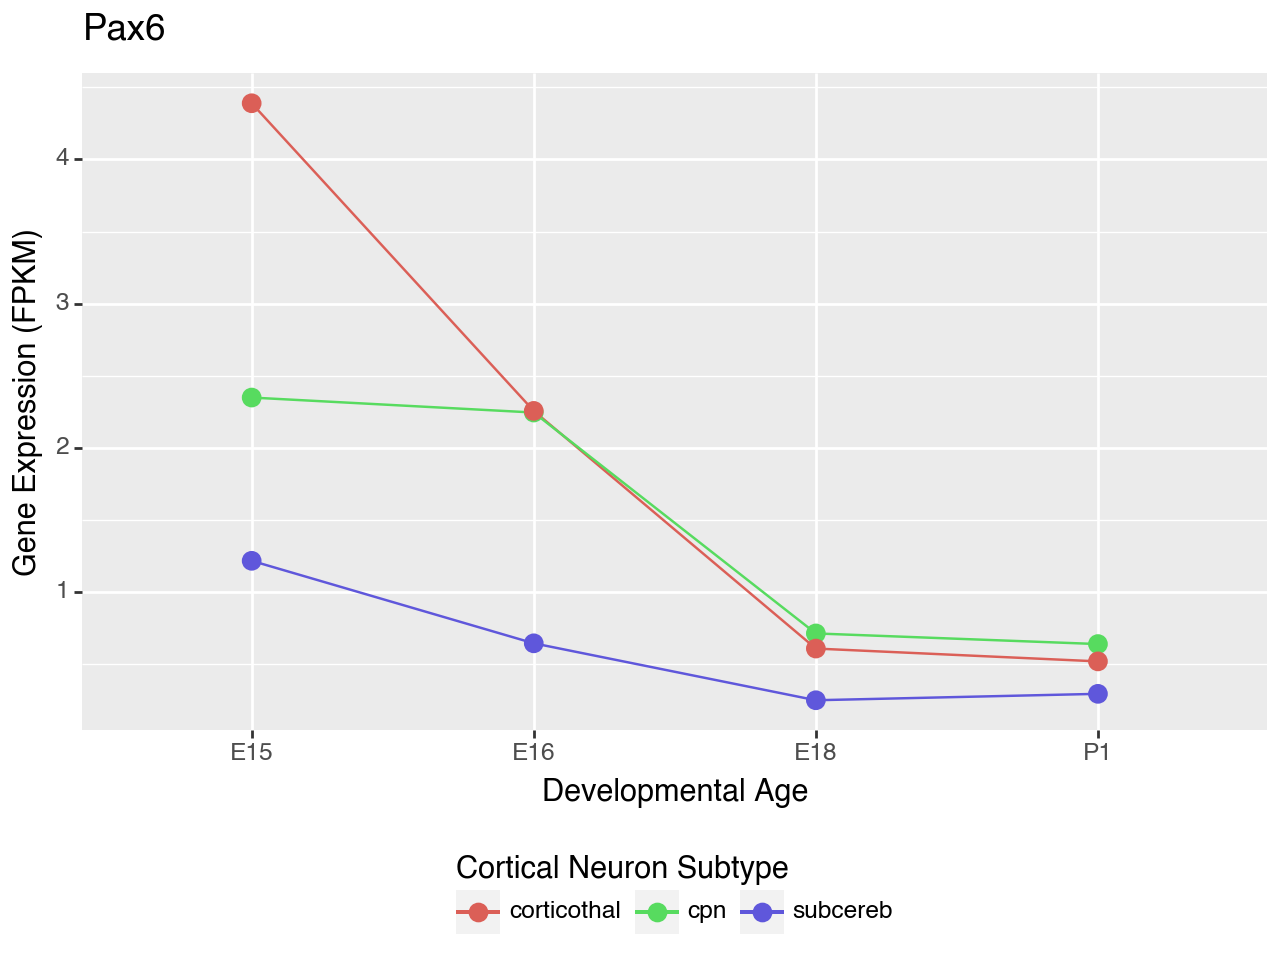

In [28]:
pax6_plot = (
    pn.ggplot(data_melted[data_melted["gene_id"] == "Pax6"], pn.aes(x="age", y="fpkm", color="celltype")) +
    pn.geom_line(pn.aes(group="celltype")) +
    pn.geom_point(size=3) +
    pn.ggtitle("Pax6") +
    pn.xlab("Developmental Age") +
    pn.ylab("Gene Expression (FPKM)") +
    pn.labs(color="Cortical Neuron Subtype") +
    pn.theme(legend_position="bottom")
)
pax6_plot.draw()


 Now imagine if you were asked to make this plot for 50 different genes?  You _could_ copy and paste this code 50 times and just change the `gene_id` in the first line of code, but that would be a lot of repeated code to write and maintain.

 Instead, let's create a function that will take a `gene_id` as an argument and return a `ggplot` object with all of the the appropriate layers added to it.

In [29]:
def plot_gene(gene_id: str) -> pn.ggplot:                       # 1. Define the function name and the list of arguments it will take. In this case, a string for the `gene_id`. The "->" pn.ggplot tells python that the function will return a ggplot object.
    p =  (                                                      # 2. reate a variable 'p' to hold our ggplot object
        pn.ggplot(                                              # 3. instantiate a ggplot object
            data_melted[data_melted["gene_id"] == gene_id],     # 4. subset the data to include only those rows for the gene of interest.  Now passing 'gene_id' as a variable
            pn.aes(x="age", y="fpkm", color="celltype"),        # 5. Map the data to the appropriate aesthetics.
        ) + 
        pn.geom_line(pn.aes(group="celltype")) +                # 6. Add the line geometry layer
        pn.geom_point(size = 3) +                               # 7. Add the point geometry layer
        pn.ggtitle(gene_id) +                                   # 8. Add the title
        pn.xlab("Developmental Age") +                          # 9. Add the x-axis label
        pn.ylab("Gene Expression (FPKM)") +                     # 10. Add the y-axis label
        pn.labs(color="Cortical Neuron Subtype") +              # 11. Add the legend title
        pn.theme(legend_position="bottom")                      # 12. Move the legend to the bottom of the plot
    )
    return p                                                    # 13. Return the ggplot object


 Now we have a function that does all the heavy lifting for us each time, and we can call this function to return our beautiful new plot on any gene of interest.

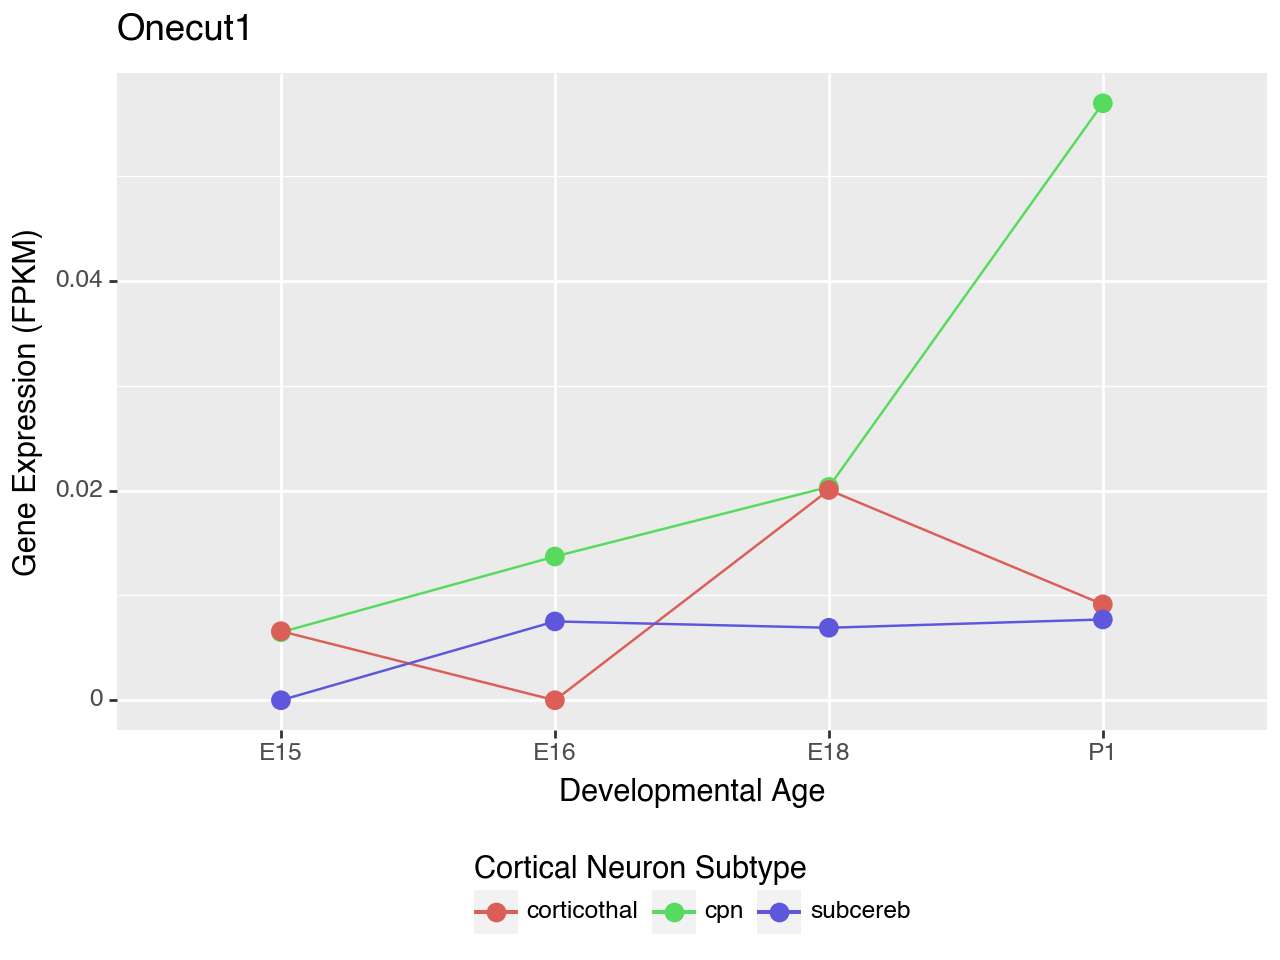

<Figure Size: (640 x 480)>

In [30]:
plot_gene("Onecut1")


 We can also use this function to create multiple plots using a list comprehension method

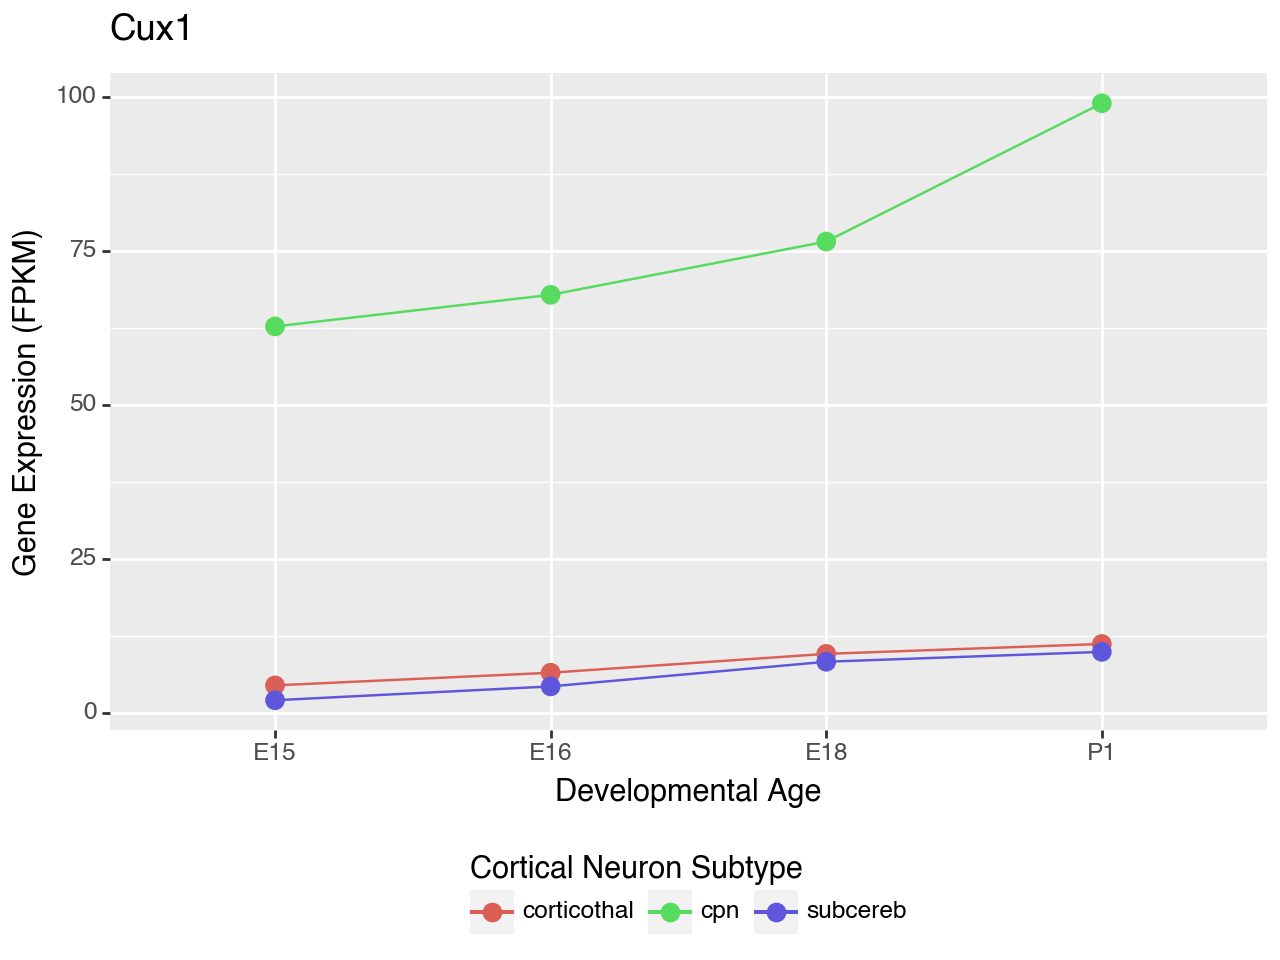

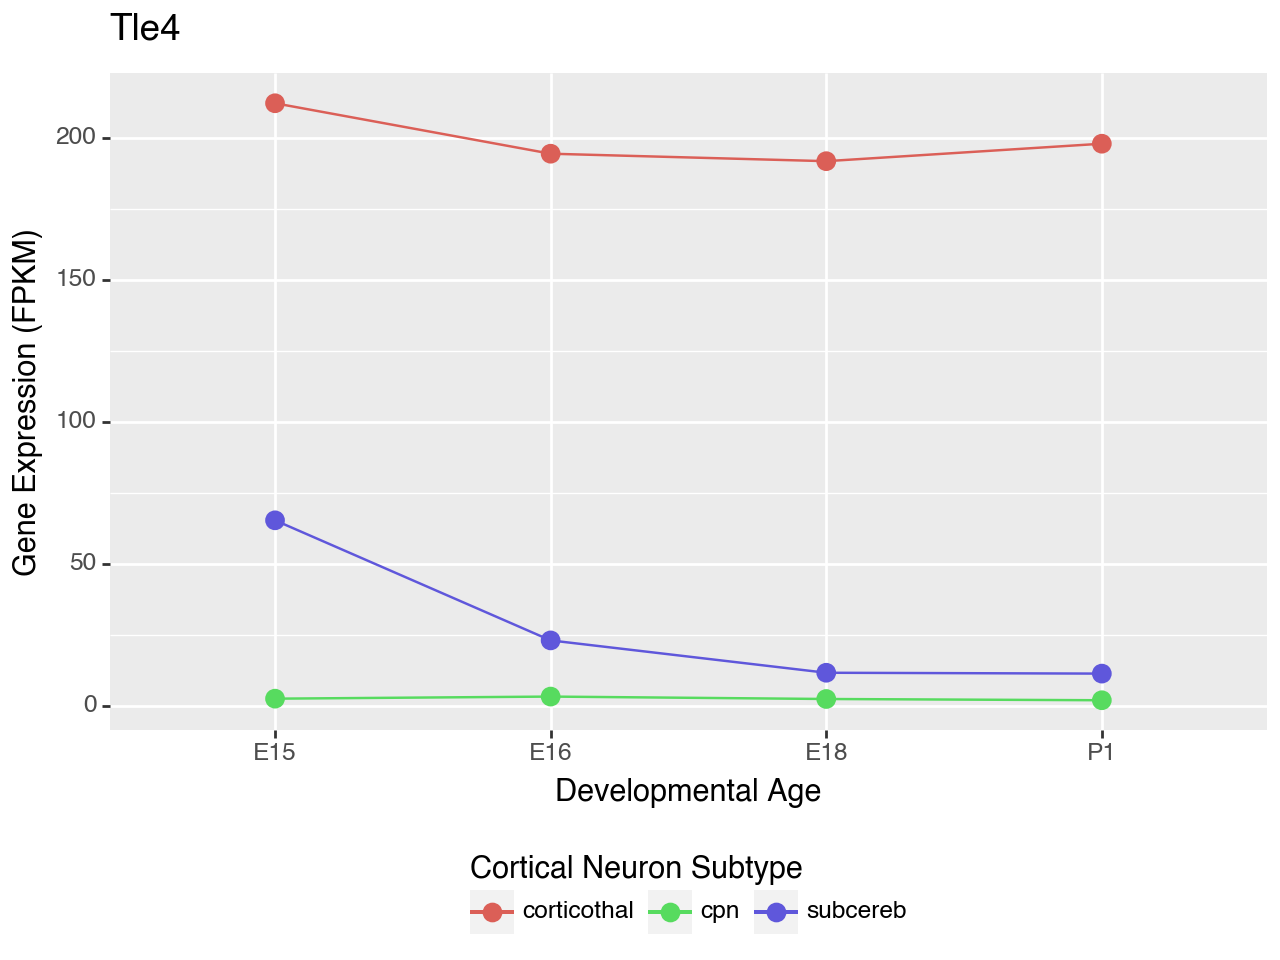

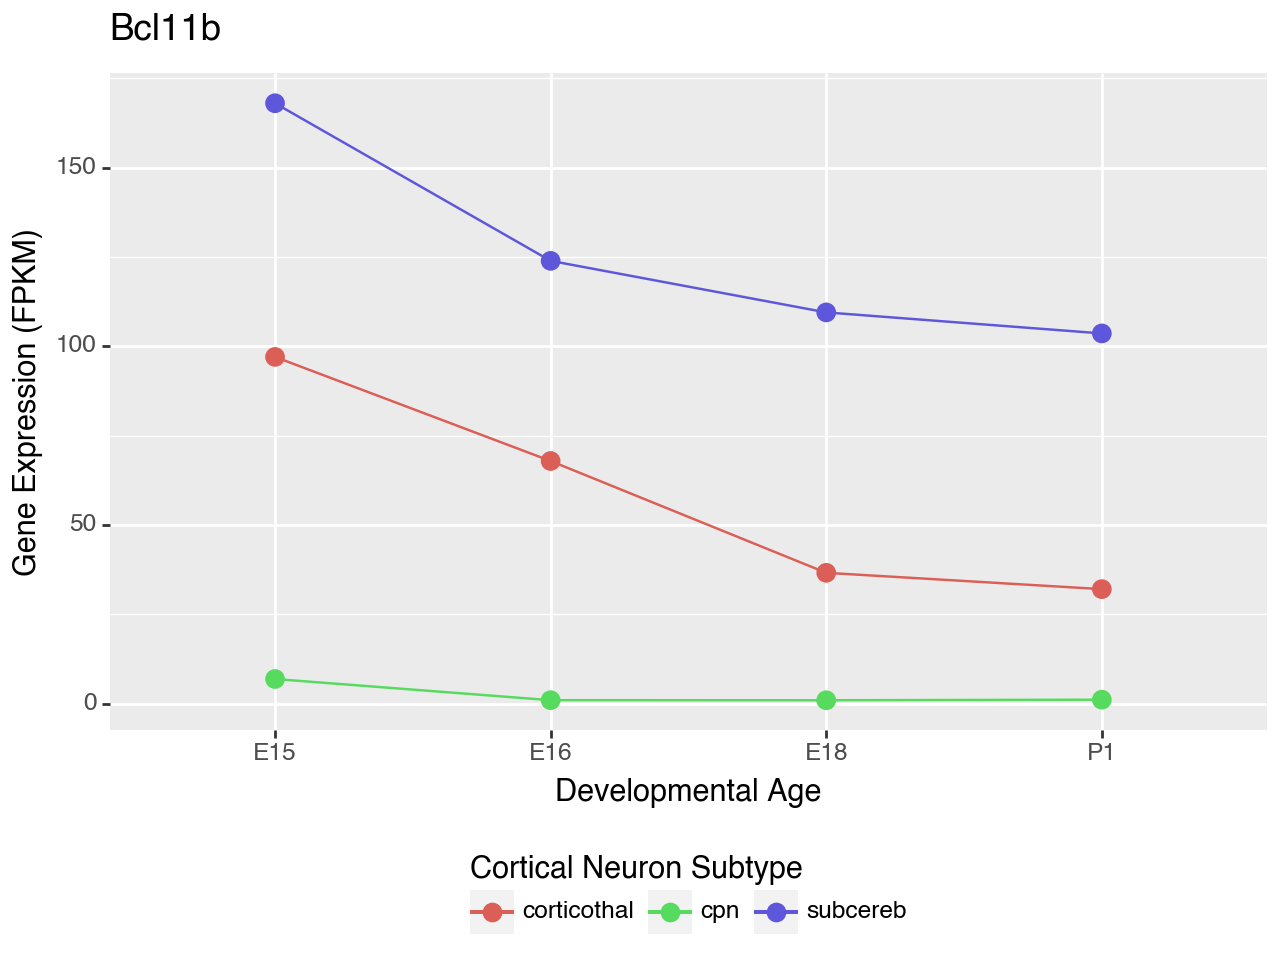

[<Figure Size: (640 x 480)>,
 <Figure Size: (640 x 480)>,
 <Figure Size: (640 x 480)>]

In [31]:
gene_list = ["Cux1", "Tle4", "Bcl11b"]

[plot_gene(gene) for gene in gene_list]


 Let's save these plots to .pdf files so that we can use them later.

In [32]:
[plot_gene(gene).save(f"{gene}_plot.pdf") for gene in gene_list]


[None, None, None]

 Turning our ggplot-based visualization into a reuseable function will save us a lot of time and effort in the long run.

 It also makes it easier to maintain our code.  If we want to change something about the plot, we only have to change it in one place, and not in 50 different places.

 ### Heatmap Example
 Suppose we wanted to generate a different kind of plot to highlight the expression levels of many genes over the conditions in our dataset.

 We could use a heatmap to do this. A heatmap is a plot where the values in a matrix are mapped to a color scale and then plotted as a grid of colored tiles.  Heatmaps are a great way to visualize large matrices of data.

 To build up a heatmap, we will use the `geom_tile()` geometry.  This geometry takes a `x` and `y` aesthetic mapping to determine the position of each tile, and then a `fill` aesthetic mapping to determine the color of each tile.

 Lets start by picking a subset of genes to plot. For this example, we will provide a list of genes known to have different expression levels across cell types

In [33]:
gene_list = ["Ermn", "Cntn6", "Bhlhe22", "Oma1", "Gng7", "Cd55", "S100a10", "Pcp4",
  "Sox5", "Fezf2", "Npr3", "Bcl11b", "Foxp2", "Tbr1", "Ppp1r1b", "Tle4",
  "Ctgf", "Cplx3", "Inhba", "Hspb3", "Epha3", "Plxnd1", "Lhx2", "Cux2",
  "Ptn", "Satb2", "Cux1", "Pvrl3", "Tle3", "Tmtc4", "Shisa6", "Lmo4",
  "Limch1", "Cpne4", "Pou3f3", "Pou3f2", "Pou3f1"]

plot_df = data_melted[data_melted["gene_id"].isin(gene_list)].copy() # Subset `data_melted` to only include rows for genes in `gene_list`

plot_df.head()

,gene_id,condition,fpkm,age,celltype,log_fpkm
4845,Bcl11b,E15_cpn,6.943310,E15,cpn,0.900002
4911,Bhlhe22,E15_cpn,125.867000,E15,cpn,2.103349
5723,Cd55,E15_cpn,0.135207,E15,cpn,0.055075
6360,Cntn6,E15_cpn,0.270491,E15,cpn,0.103972
6523,Cplx3,E15_cpn,0.027903,E15,cpn,0.011952


 Now that we've selected the subset of data that we're going to use for our heatmap, let's do a bit more polishing and prepping of the data.

 The value that we are interested in plotting is not the `fpkm` or the `log_fpkm` directly, but rather a 'row-normalized` version of the `log_fpkm` values (i.e. a z-score).

 This normalized value places each of the genes on roughly the same scale, and makes it easier to see the differences between the genes and across the conditions.

In [34]:
# Row normalize the data
groups = plot_df[["gene_id", "log_fpkm"]].groupby("gene_id")

mean = groups.transform("mean") # Calculate the group mean for each gene
std = groups.transform("std") # Calculate the group standard deviation for each gene

# Calculate the z-score and create a new column in the plot_df DataFrame
plot_df["zscore"] = (plot_df['log_fpkm'] - mean['log_fpkm']) / std['log_fpkm']

plot_df.head()


,gene_id,condition,fpkm,age,celltype,log_fpkm,zscore
4845,Bcl11b,E15_cpn,6.943310,E15,cpn,0.900002,-0.698068
4911,Bhlhe22,E15_cpn,125.867000,E15,cpn,2.103349,0.531274
5723,Cd55,E15_cpn,0.135207,E15,cpn,0.055075,-1.185770
6360,Cntn6,E15_cpn,0.270491,E15,cpn,0.103972,-1.006774
6523,Cplx3,E15_cpn,0.027903,E15,cpn,0.011952,-0.367757


 Now that we have the data we want to plot, let's construct our heatmap visualization

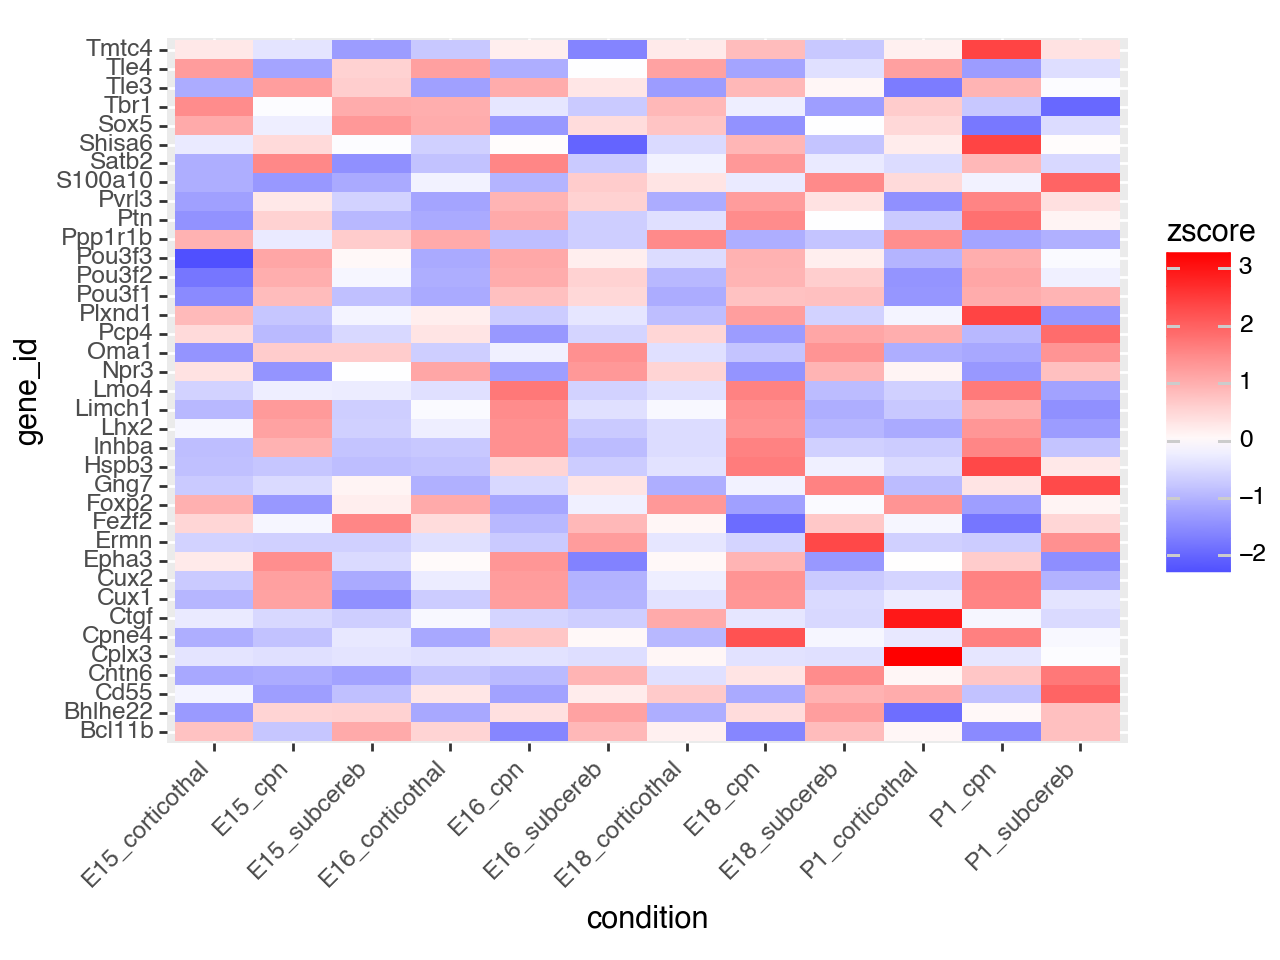

In [35]:
heatmap_plot = (
    pn.ggplot(plot_df, pn.aes(x="condition", y="gene_id", fill="zscore"))
    + pn.geom_tile()
    + pn.scale_fill_gradient2(low="blue", mid="white", high="red")
    + pn.theme(axis_text_x=pn.element_text(rotation=45, hjust=1))
)

heatmap_plot.draw()


 The values are all there, but the plot is a bit hard to read.  Let's make a few tweaks to make it a bit easier to interpret.

 Specifically, we are going to facet the plot by `celltype` to split the plot into separate panels for each celltype

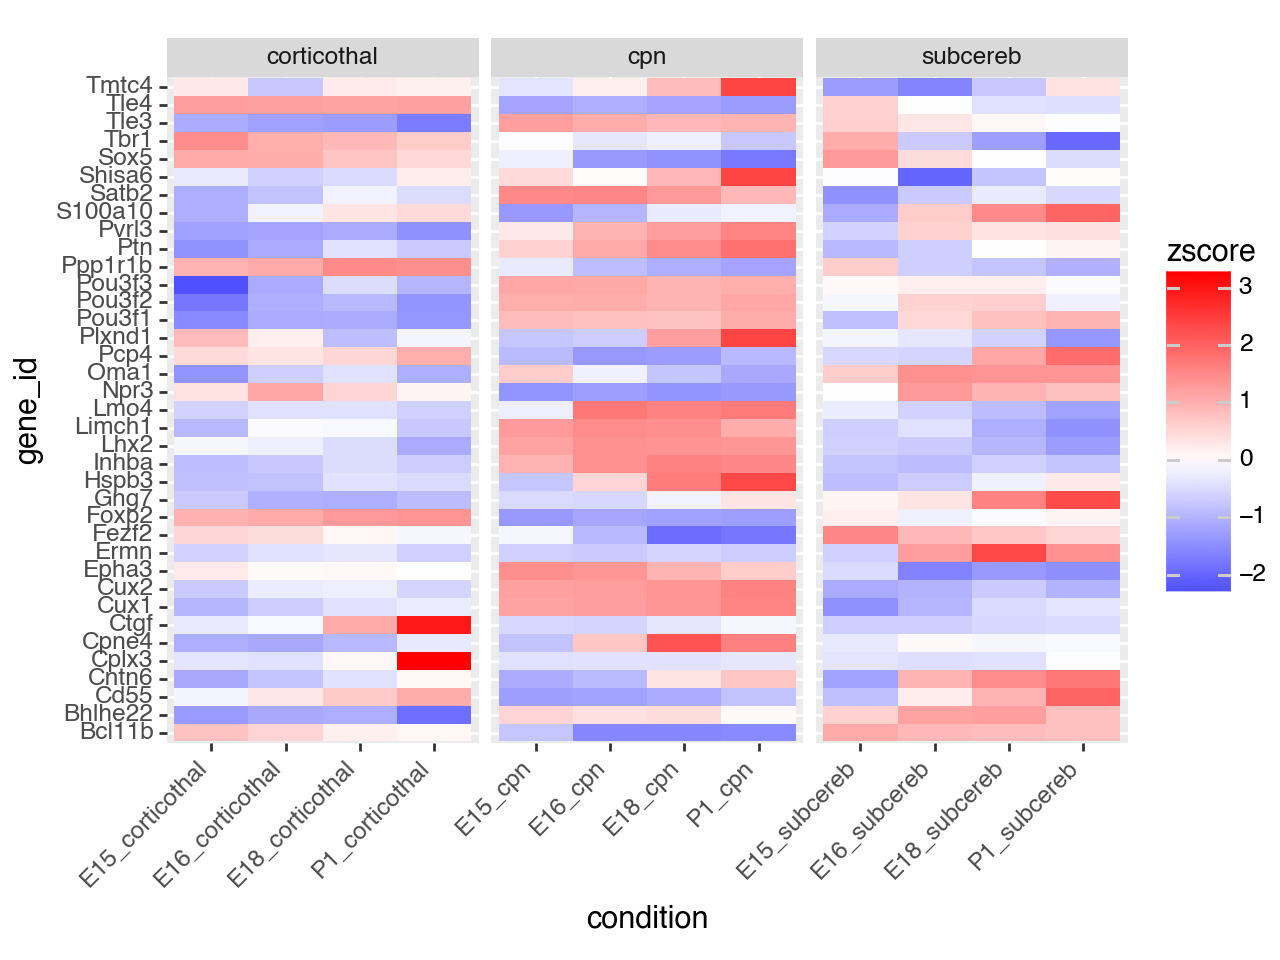

<Figure Size: (640 x 480)>

In [36]:
heatmap_plot + pn.facet_wrap("celltype", scales="free_x")


## Wrapping up
 Finally, it's important to realize that `plotnine` is one of **many** plotting and visualization tools in python.

 We've chosen to highlight `plotnine` because it is a python implementation of the `ggplot2` package in R, which is a very powerful and flexible visualization package.

 Both of these packages use the 'Grammar of Graphics' framework which is a great way to conceptualize how to build up a visualization from components.

 As an added bonus, if you learn 'GoG' in either language, you can easily transfer that knowledge to the other language and be up and making plots in no time.

 ## Other plotting packages
 In addition to other base plotting packages in python (e.g. `matplotlib`), there are a number of other plotting packages that are built on top of `matplotlib` that provide different frameworks and approaches for creating plots.
 A few examples include:
 * [seaborn](https://seaborn.pydata.org/)
 * [plotly](https://plotly.com/python/)
 * [bokeh](https://docs.bokeh.org/en/latest/index.html)
 * [altair](https://altair-viz.github.io/)
 * [pygal](http://www.pygal.org/en/stable/)
 * [pygraphviz](https://pygraphviz.github.io/)

 Just to name a few

 Each of these packages has its own strengths and weaknesses, and each has its own 'grammar' for building up plots.

 The best way to figure out which plotting package is best for you is to try a few of them out and see which one you like best.

 Many different packages focus on optimizing or drawing different types of plots.

 As a final example, the [seaborn](https://seaborn.pydata.org/) package is a plotting package that is built on top of `matplotlib` and provides a number of high-level plotting functions that are optimized for statistical visualizations.

 On such plot is a 'clustermap' which is a heatmap that has been clustered using hierarchical clustering to group similar rows and columns together.

 Below is an example of using `seaborn.clustermap()` to visualize the same data that we used above to create our heatmap and you can compare the visualizations.

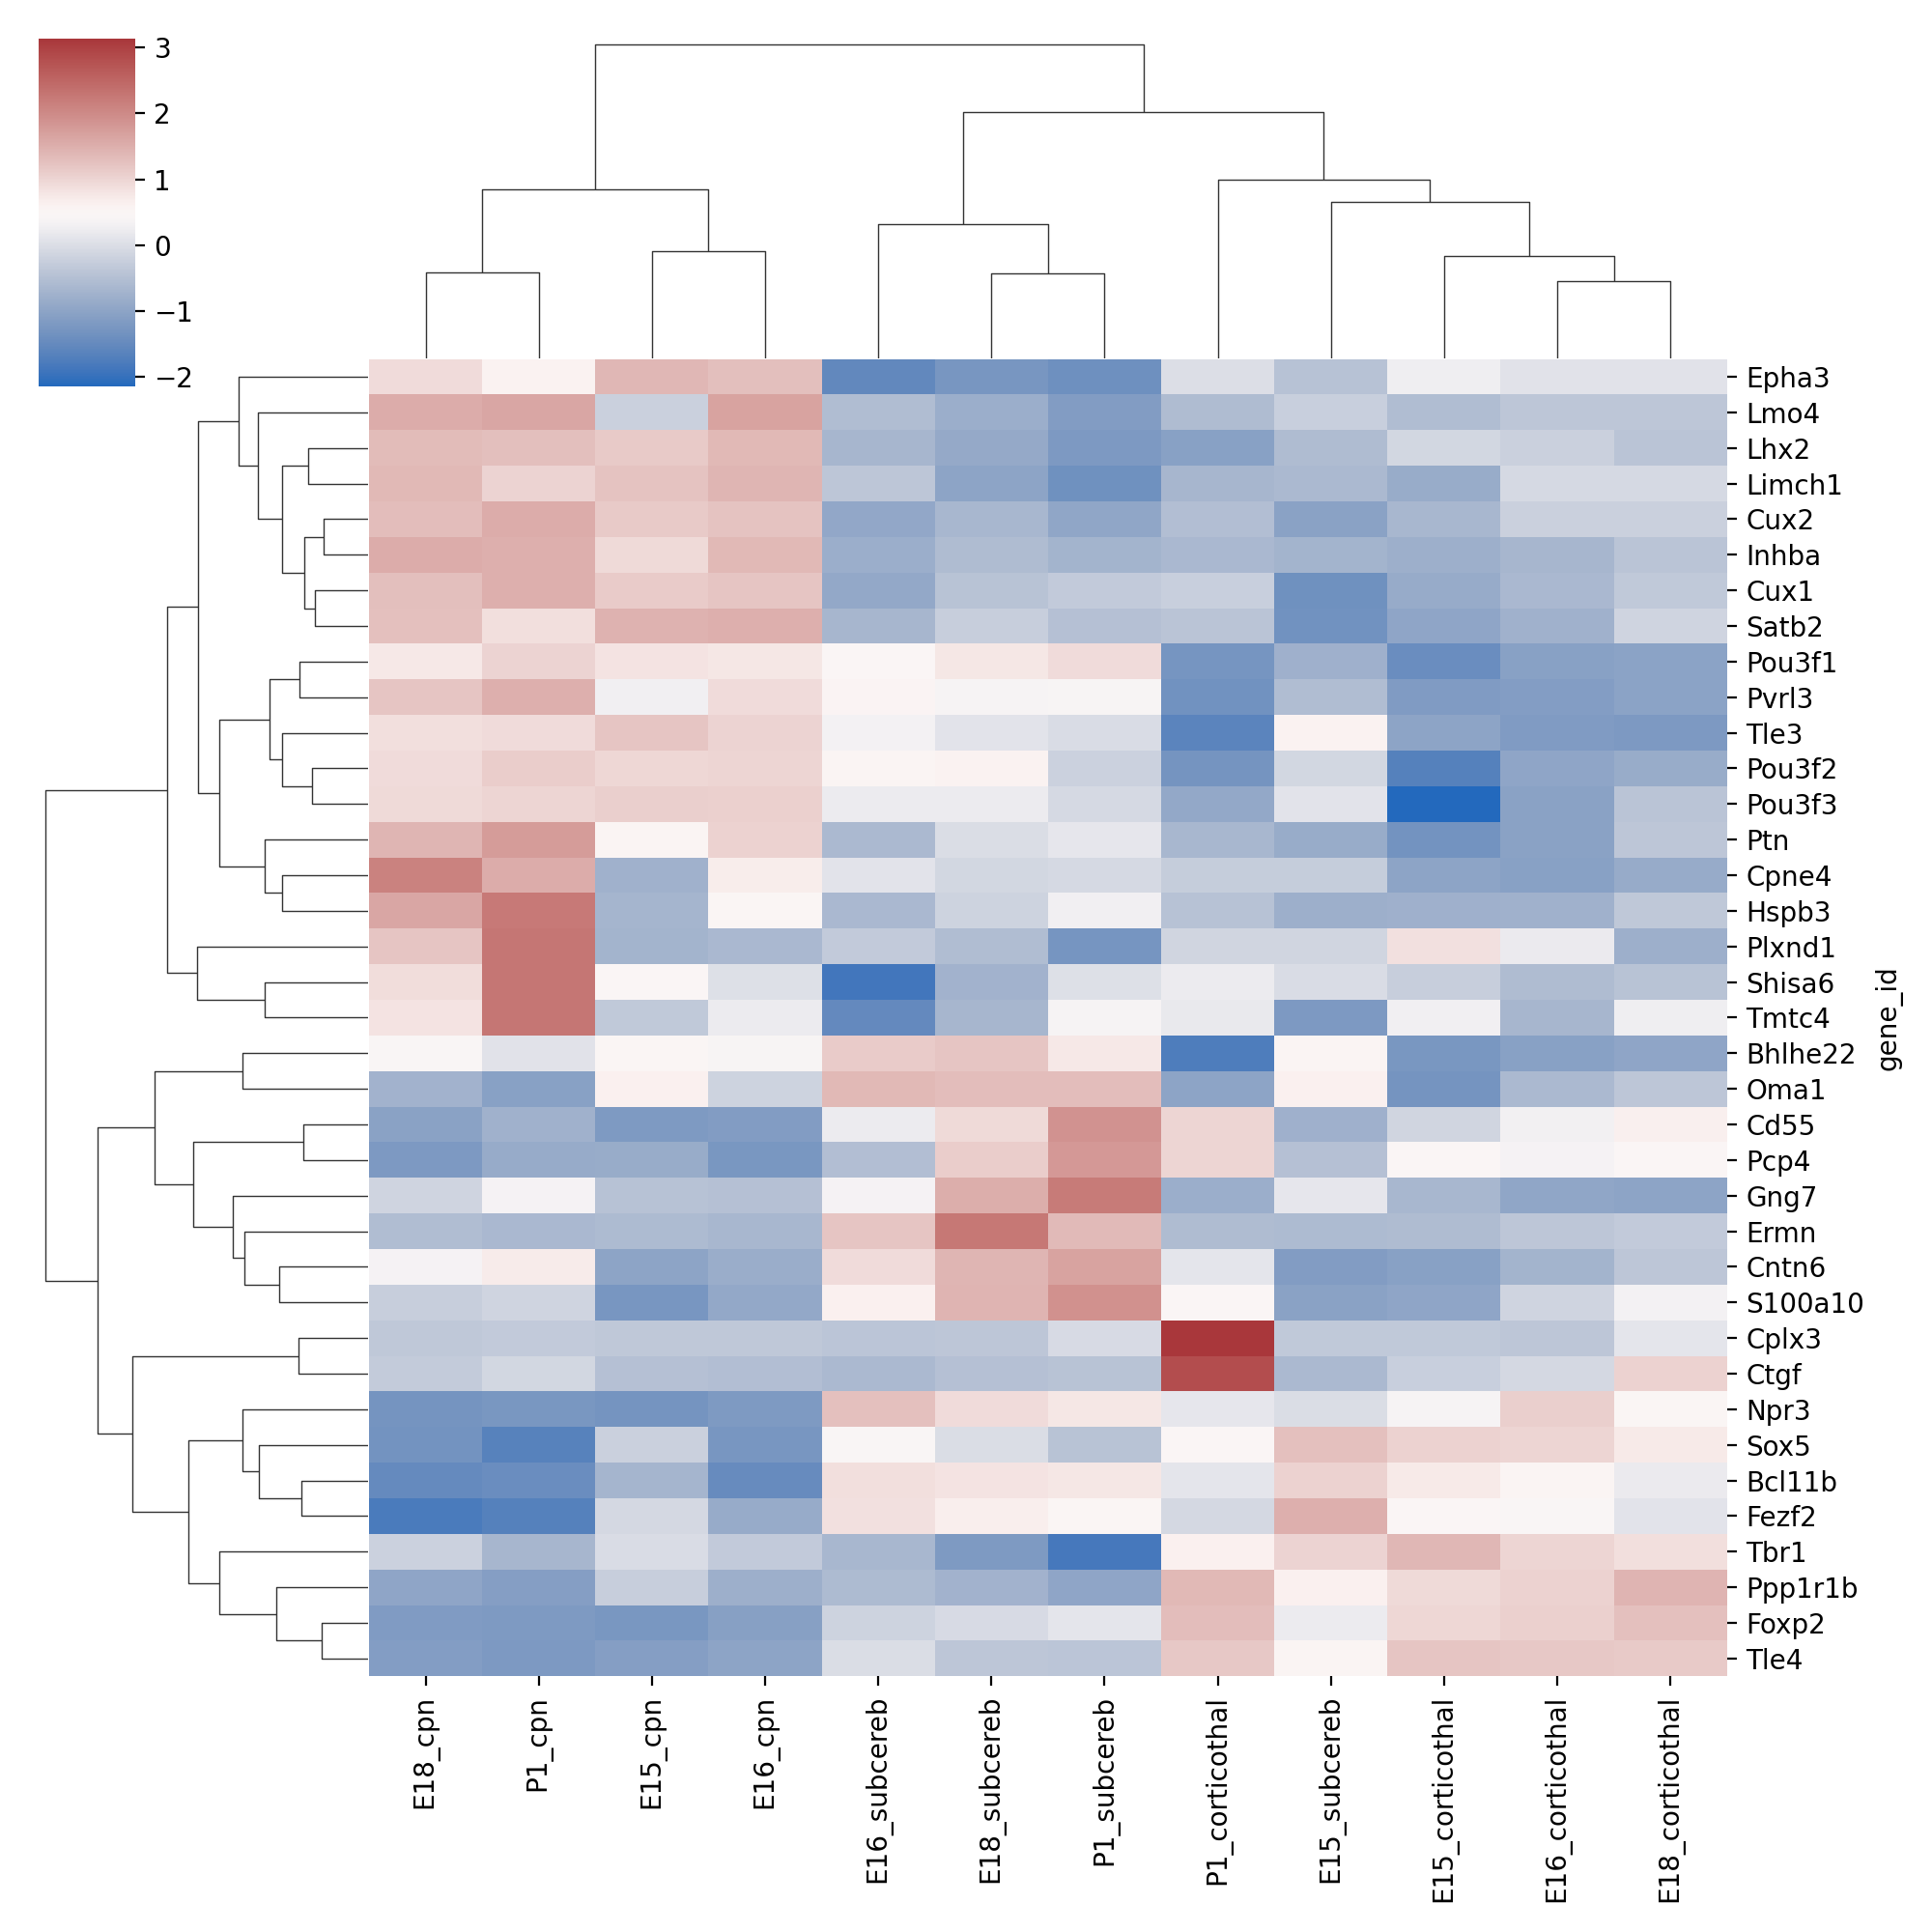

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Since clustermap requires a matrix of values, we will use the original `data` `DataFrame` and subset it for the genes of interest
cluster_data = data[data["gene_id"].isin(gene_list)]

# Lets move the gene_id column to the index so that it is not included in the heatmap
cluster_data = cluster_data.set_index('gene_id')

# Next we will log10(fpkm+1) transform the entire matrix
cluster_data = np.log10(cluster_data + 1)

# And then, with one final line of code, we can generate a clustered heatmap of the data
sns.clustermap(cluster_data, z_score=0, cmap="vlag") # z_score=0 performs row normalization for you. cmap="vlag" chooses a Blue->White->Red color palette to match above

plt.show() # This is necessary to display the plot in Jupyter Notebook


 If you're interested in deconstructing exactly what's happening above, you can check out the [seaborn.clustermap()](https://seaborn.pydata.org/generated/seaborn.clustermap.html) documentation.

 ## Resources
 * [plotnine documentation](https://plotnine.readthedocs.io/en/stable/index.html)
 * [plotnine examples](https://plotnine.readthedocs.io/en/stable/gallery.html)
 * [Grammar of Graphics](https://www.springer.com/gp/book/9780387245447)
 * [ggplot2 cheat sheet](https://statsandr.com/blog/files/ggplot2-cheatsheet.pdf)